<a href="https://colab.research.google.com/github/corvusMidnight/thesis/blob/main/LINGUISTIC_FEATURES_MODELS_FINE_TUNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
##### IMPORTS #####
%%capture
!pip install -r requirements.txt | grep -v 'already satisfied'
!pip install demoji

!pip install lazypredict
!pip install plotly
!pip install emoji
!pip install tokenizer
!pip install transformers
!pip install simpletransformers
!pip install happytransformer
!pip install optunity

#Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import re
import seaborn as sns
import string
import operator
import plotly.express as px
from collections import Counter
from time import time
import pickle
from scipy import stats
import demoji

#NLP imports
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Baseline with LazyClassifier
from lazypredict.Supervised import LazyClassifier, LazyRegressor

#nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword=set(stopwords.words('italian'))
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, FreqDist
stemmer = nltk.SnowballStemmer("italian")
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import ngrams, FreqDist
nltk.download('punkt')

#Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

#Evaluation tools
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, log_loss
import optunity
import optunity.metrics


#Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#Pipeline visualization
from sklearn import set_config
from sklearn.utils import estimator_html_repr

#Pipeline display mode
set_config(display='diagram')


#Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from collections import Counter
from collections import defaultdict
import unicodedata as uni
from google.colab import drive 
import emoji
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
from tokenizer import *
from transformers import AutoTokenizer, AutoModel
from simpletransformers.classification import ClassificationModel, ClassificationArgs

#Model tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

#Neural and pretrained models
import torch
from torch import nn 
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from happytransformer import HappyTextClassification

from datasets import Dataset
from datasets import load_metric
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import TrainingArguments, AutoModelForSequenceClassification, Trainer

In [ ]:
## Load the data
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ITA_FB_TRAIN=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_train.csv')

ITA_FB_TEST=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
ITA_FB_TEST2=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
ITA_FB_TEST2.drop('Unnamed: 0', axis=1, inplace=True)


ITA_FB_REF = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
ITA_FB_REF = ITA_FB_REF.rename(columns={0: 'ID', 1: 'text', 2: 'label'})

ITA_FB_TEST2['label'] = ITA_FB_REF['label'].values


## Functions

In [ ]:
# this file contains functions that can be imported in other py.scripts

abbrev_dict = {
'aspetta':['asp', 'aspe'],
'anche':'anke',
'bene':'bn',
'birthday':['bday', 'b-day'],
'boyfriend':['bf', 'boy'],
'bravo':'brv',
'capito':'cpt',
'che':'ke',
'ci sei':['c6', 'c 6'],
'come':'cm',
'comunque':'cmq',
'con':'cn',
'cosa': 'cs',
'dev':'developer',
'easy':'EZ',
'Facebook':'fb',
'forever':'4ever',
'fuck':['fck','fk'],
'fucking':['fcking','fking'],
'grazie':['gratz', 'gz'],
'great':'gr8',
"I don't know":'dunno',
'inderdaad':'idd',
'Instagram': 'insta',
'messaggio':['mex','messa'],
'nevermind':'nvm',
'non':'nn',
'niente':'nnt',
'thanks':['thx', 'tx','thks', 'thnx'],
'please':'plz',
'per sempre':'xseo',
'perché': ['xche', 'xché', 'xchè'],
'qualcuno':'qcn',
'rosicare':'rosik',
'scusa':'scs',
'sei un':'6 1',
'sorry':['sry', 'srry'],
'ti voglio bene per sempre': ['tvbxseo'],
'too easy':'2EZ',
'tremendo':'3mendo',
'va bene':['vbne', 'vbbe', 'vbbè'],
'vaffanculo':['vaffa', 'fanculo'],
'what':['wat', 'wht', 'wut'],
}


acronym_dict_EN = {
'also known as':'AKA',
'as soon as possible':'asap',
'at the moment': 'atm',
'away from keyboard':'AFK',
'be right back':'brb',
'best friend for life':'bffl',
'best friend forever':'bff',
'by the way':'btw',
'for the win':'ftw',
'fuck my life':'fml',
"I don't know":'idk',
'I know, right' : 'ikr',
'I love you': 'ily',
'in my humble opinion':'imho',
'in my opinion':'imo',
'in real life':'irl',
'laughing my ass off':'lmao',
'laughing my fucking ass off':'lmfao',
'laughing out loud':'lol',
'love you so much':'lysm',
'love you':'ly',
'love you so much': 'lysm',
'never want to lose you': "nwly",
'no problem': "np",
'oh my god':'omg',
'rolling on the floor laughing':'rofl',
'see you':'cu',
'shut the fuck up':'stfu',
'talk to you later':'ttyl',
'to be honest':'tbh',
'what the fuck':'wtf',
'what the hell':'wth',
'you are welcome' : "yw",
'you only live once':'yolo'}


acronym_dict_IT = {
'cresci bene che ripasso':'cbcr',
'figli di puttana':'fdp',
'ti amo di bene': ['tadb'],
'ti voglio bene': ['tvb']}

##### FEATURE: EMOTICONS #####


# we define 'normal' unicode chars, i.e. non-emoji
###normal_unicode = ('VARIATION', 'SELECTOR', 'SELECTOR-16', 'GREEK', 'ARROW', 'HANGUL', 'DAGGER','LATIN', 'DOT', 'MACRON', 'DIFFERENTIAL', 'ELLIPSIS', 'ORDINAL','INDICATOR', 'DASH', 'TILDE','DIAERESIS','APOSTROPHE','LINE','LETTER', 'SPACE', 'DIGIT', 'HYPHEN-MINUS', 'COMMA', 'COLON', 'AMPERSAND', 'COMMERCIAL','STOP', 'ACCENT', 'PARENTHESIS', 'SOLIDUS', 'MARK', 'FULL STOP','SEMICOLON','ASTERISK', 'BRACKET','SIGN')
normal_unicode = ('DRAWINGS', 'BLOCK', 'SYLLABLE', 'HANGUL', 'QUOTATION', 'MINUS', 'COMBINING', 'INDICATOR', 'HEBREW', 'CENT', 'TILDE', 'ORDINAL', 'DIFFERENTIAL', 'COMMA', 'LATIN', 'COLON',  'VOWEL', 'NUMERO', 'APOSTROPHE', 'LESS-THAN', 'AFGHANI', 'LETTER', 'PARENTHESIS', 'SELECTOR-16', 'AMPERSAND', 'DEGREE', 'HYPHEN-MINUS', 'EURO', 'PLUS-MINUS', 'ACCENT', 'OHM', 'BRACKET', 'ARABIC', 'SUPERSCRIPT', 'NOMISMA', 'SECTION', 'QUESTION', 'ELLIPSIS', 'DAGGER', 'COMMERCIAL', 'EURO-CURRENCY', 'MINUS-OR-PLUS', 'CYRILLIC', 'ASTERISK', 'GREATER-THAN', 'CURRENCY', 'EQUALS', 'PERSIAN', 'STOP', 'PERCENT', 'SUBSCRIPT', 'TRADE', 'DIAERESIS', 'LINEAR', 'LINE', 'PER', 'DOT', 'DASH', 'COPYRIGHT', 'DIVISION', 'SOLIDUS', 'ARMENIAN', 'MICRO', 'TAI', 'SPACE', 'PERSIAN', 'DIGIT', 'KELVIN', 'SEMICOLON', 'NUMBER', 'PLUS', 'OUNCE', 'ROMAN', 'POUND', 'MULTIPLICATION', 'GREEK', 'EXCLAMATION', 'SELECTOR', 'DOLLAR', 'MODIFIER', 'VARIATION')


# remark: 'VARIATION SELECTOR-16': ️ Variation Selector-16:
# "An invisible codepoint which specifies that the preceding character should be displayed with emoji presentation. Only required if the preceding character defaults to text presentation."

# remark2: 'ARROW' eruit gehaald, want te veel smileys met een pijl, en weinig echte pijlen in CMC

facebook_faces = ["smile",
"frown",
"unsure",
"grin",
"tongue",
"wink",
"gasp",
"upset",
"cry",
"confused_rev",
"confused",
"grumpy",
"confused",
"glasses",
"sunglasses",
"devil",
"angel",
"kiss",
"kiki",
"squint",
"pacman",
"colonthree"]





##### REGEXES #####

punct = re.compile(r'[\?\!,.:;()"\*\s]+') 
# remark: \s added to punct in order to still split on whitespace too
# remark: a single quotation mark isn't added, in order to still detect abbreviations like 'k, 't, ...


##### FUNCTIONS #####

def split_textNEW(text):
	"""
	function to split a text into tokens in slightly different ways

	input:
		- 'text': a text string

	output:
		- lists of:
			- tokens with punct attached
			- tokens without punct
			- lowercased tokens without punct
			- lowercased tokens with punct
		- the lowercased text
	"""

	# we also create a lowercased version of the text
	text_lower = text.lower()

	# we split both versions
	# ==> tokens: words with poss. punctuation attached
	tokens = [item for item in text.split() if item]
	tokens_lower = [item for item in text_lower.split() if item]

	# ==> clean_tokens: words without poss. punctuation attached
	clean_tokens = [item for item in re.split(punct,text) if item]
	clean_tokens_lower = [item for item in re.split(punct,text_lower) if item]

	return(tokens, clean_tokens, clean_tokens_lower, tokens_lower, text_lower)

"""script to count several non-standard Italian features in a social media corpus"""



##### REGEXES #####

numbers_and_ordinals = re.compile(r'^\d+(de|st|ste|e)?$')
ordinals_EN = re.compile(r'^\d+(nd|th|rd)$')
hyperlink = re.compile(r'(http:\/\/)?(www\.)?\w+\.(com|be|org|nl|ac|fm|gov|me|net|webs|de|co|uk|it|fr|to|nu|tk).*')
email = re.compile(r'[a-zA-Z0-9-_.]+@\w+\.\w+')
hour_refs = re.compile(r'^\d{1,2}u(\d{2})?$')
hashtags = re.compile(r'^#\w+$')
ats = re.compile(r'^@[a-zA-Z]+:?$')
files = re.compile(r'^.+\.(doc|docx|pdf|ppt|pptx|xml|jpg|png|jpeg|psd)$')
money = re.compile(r'^\d+(€|\$|£)$')
pages = re.compile(r'^(p|P)\.?\d+(\-\d+)?$')
meter = re.compile(r'^\d+k?m$')

western_emoticons_all = re.compile(r'(<?[:;xX\|=8]\'?[-^o]?[\)\(xXpPSsdDoOvV\|\/\*$@#\[\]])|([\)\(][-^o]?\'?[:;]>?)') # including some MSN emoticons consisting of letters and punct marks
not_western_emoticons = re.compile(r'(\w)\1{1,}')
flooding_x = re.compile(r'^x+$')
flooding_xo = re.compile(r'^(x+o+)+x?$')


##### FUNCTIONS FOR FEATURE DETECTION #####


##### FEATURE: FLOODING #####


def letter_flooding(tokens):
	"""
	this function analyzes the use of letter and punctuation flooding in a text, i.e. the repetition of a character

	input:
		- 'tokens': a text split on whitespaces (i.e. a list of the tokens of a text)

	output:
		- the absolute number of (words containing) letter flooding in the text
		- the relative number of (words containing) letter flooding in the text
		- a freq dict of the words containing letter flooding
	"""

	# we create containers to store the flooding occurrences
	flooding_letters = defaultdict(int)

	# we define letter flooding
	# letter flooding: repetition of three or more times the same letter (as a repetition of two times the same letter occurs frequently in Standard Dutch words)
	flooding_alpha = re.compile(r'([a-z])\1{2,}')
	# we will, however, not count the repetition of the letter 'x' or the combi 'xo' as flooding, as this repetition does not represent a lengthening of the sound /ks/
	flooding_x = re.compile(r'^x+$')
	flooding_xo = re.compile(r'^(x+o+)+x?$')

	# we store the occurrences of flooding
	# we only want to work with clean tokens

	clean_tokens = []

	for token in tokens:
		token_lower = token.lower()

		# we do not want to count hyperlinks and emoticons as flooding
		if not (hyperlink.search(token_lower) or email.search(token_lower) or (emoticons([token])[0] > 0)):
			clean = [item.lower() for item in re.compile(r'\W+').split(token) if item != ""]
			clean_tokens += clean

	for token in clean_tokens:

		if flooding_alpha.search(token.lower()):
			# we add 1 to a general counter per flooded letter
			# we do not want to detect flooding of the letter x
			flooded_letters_without_x = [letter for letter in flooding_alpha.findall(token) if letter.lower() != 'x']
			if len(flooded_letters_without_x) != 0:
				for letter in flooded_letters_without_x:
					flooding_letters[letter.lower()+'-variants'] += 1
				# we store the clean token
				flooding_letters[token.lower()] += 1


	# all flooded words:
	number_flooding_letters = sum([flooding_letters[key] for key in flooding_letters if not key.endswith('-variants')])
	#number_flooding_letters = sum(flooding_letters.values())
	# the percentage of flooded words:
	if len(tokens) != 0:
		percentage_flooding_letters = float(number_flooding_letters)/len(tokens)
	else:
		percentage_flooding_letters = 0

	# we return these relative numbers and freq dicts
	return(number_flooding_letters,percentage_flooding_letters,flooding_letters)


def punct_flooding(tokens):
	"""
	this function analyzes the use of punctuation flooding in a text, i.e. the repetition of a punctuation mark

	input:
		- 'tokens': a text split on whitespaces (i.e. a list of the tokens of a text)

	output:
		- the absolute number of punctuation flooding
		- the relative number of punctuation flooding
		- a freq dict of the flooded punctuation marks
		- the number of (groups of) punctuation marks in the text
	"""

	# we create containers to store the flooding occurrences
	flooding_punctuation = defaultdict(int)

	# punctuation flooding: repetition of two or more times a question or exclamation mark
	flooding_nonalphanumeric = re.compile(r'(\?|!)\1{1,}')
	"""# in the Netlog data, letters with accent marks are often replaced by '???' we do not want to count this as punct flooding
	not_flooding_nonalphanumeric = re.compile(r'\w+(\?){3}\w+')""" # not applicable here

	# we only want to store the actual punctuation marks and not the letters attached
	clean_punc = []

	for token in tokens:
		clean = [item for item in re.compile(r'\w+').split(token) if item != ""]
		clean_punc += clean


	# we store the occurrences of flooding
	for token in clean_punc:
		if flooding_nonalphanumeric.search(token):
			# we add 1 to the general counter per punct mark
			for punctmark in flooding_nonalphanumeric.findall(token):
				flooding_punctuation[punctmark+'-variants'] += 1
			# we store the occurrence
			flooding_punctuation[token] += 1

	# we will need to compare the number of flooded punct.marks to the total amount of these punct.marks
	# we define and count all (groups of) non-flooded question and exclamation marks
	nr_nonflooded_punct = 0
	# single question and excl. marks:
	single_punct = re.compile(r'^[\?!]$')
	#single_punct_after_word = re.compile(r'\w[\?!]')
	# unconv. combinations of question and excl. marks: (e.g. 'hello?!?!')
	# we only count the combinations in which no flooding is present (e.g. we do count '?!?!' but not '?!??', as it is already counted)
	#unconv_combis_without_flooding_regex = re.compile(r'^((!\?)+!?)|((\?!)+\??)$')
	unconv_combis_without_flooding_regex = re.compile(r'^(?:(?:\!\?)+!?)|(?:(?:\?\!)+\??)$')
	#unconv_combis_without_flooding_regex_after_word = re.compile(r'\w+((!\?)+!?)|((\?!)+\??)')
	#unconv_combis_without_flooding_regex_after_word = re.compile(r'\w+(?:(?:(?:\!\?)+\!?)|(?:(?:\?\!)+\??))$')

	for token in clean_punc:
		if (single_punct.match(token) or unconv_combis_without_flooding_regex.match(token)):
			nr_nonflooded_punct += 1

	# now we can calculate the total nr of occurrences of excl. and question marks
	number_flooding_punct = sum([flooding_punctuation[key] for key in flooding_punctuation if not key.endswith('-variants')])
	total_punct = nr_nonflooded_punct + number_flooding_punct

	# the percentage of flooded punctuation:
	if total_punct != 0:
		percentage_flooding_punct = float(number_flooding_punct)/total_punct
	else:
		percentage_flooding_punct = 0

	# we return these relative numbers and freq dicts
	return(number_flooding_punct,percentage_flooding_punct,flooding_punctuation, total_punct)




def emoticons(tokens):
	"""
	this function analyzes the use of emoticons in a text

	input:
		- 'tokens': a text split on whitespaces (i.e. a list of the tokens of a text)

	output:
		- the absolute number of emoticons in the text
		- the relative number of emoticons in the text
		- a freq dict of the emoticons
	"""

	# we define different sorts of emoticons
	# we also detect emoticons that may be attached to words, to make sure not to miss any (e.g. 'haha:D')

	### Western emoticons ### (in two directions, e.g. ':)' and '(:')
	western_emoticons_all = re.compile(r'(<?[:;xX\|=8]\'?[-^o]?[\)\(xXpPSsdDoOvV\|\/\*$@#\[\]])|([\)\(][-^o]?\'?[:;]>?)') # including some MSN emoticons consisting of letters and punct marks
	# however, we do not want to detect e.g. 'xx' or 'oo' as smileys
	not_western_emoticons = re.compile(r'(\w)\1{1,}')

	# neither do we want to detect smileys as 'XO' in kisses like 'xoxoxo'
	flooding_x = re.compile(r'^x+$')
	flooding_xo = re.compile(r'^(x+o+)+x?$')
	# we also do not want to recognize smileys in hyperlinks (e.g. ':/' is no smiley in this situation: https:/www. ...)
	hyperlink = re.compile(r'(http:\/\/)?(www\.)?\w+\.(com|be|org|nl|ac|fm|gov|me|net|webs|de|co|uk|it|fr|to|nu|tk).*')

	### Asian emoticons ###
	asian_emoticons = re.compile(r'(\^_*\^)|(\^o?\^)|([oO0]_+[oO0])|(T_+T)|([\-\—]_+[\-\—])|(\-\.\-)|(_O_)|(<_+<)|(<\.<)|(>_+>)|(>\.>)|(n_+n)|(n\.n)|(n,n)|(u_+u)|(u\.u)|(u,u)')

	### Hearts ###
	hearts = re.compile(r'(<+3+)|(x3+)|(X3+)')

	### typical MSN emoticons #####
	# LH not relevant in this corpus
	#MSN_emoticons = re.compile(r'\([hHaAlLuUkKnNyY]\)')

	### typical Netlog emoticons ###
	# LH not relevant in this corpus
	#Netlog_emoticons = re.compile(r'\[(?:(?:@[a-zA-Z0-9\-]+)|(?:#\w+(_anim)?)|(?: Love )|(?: blush )|(?: dohh )|(?: hug )|(?: whistle )|(?: x )|(?:Crazylove)|(?:Flash)|(?:Hug)|(?:theband)|(?:thebonk)|(?:theflasher)|(?:theguitare)|(?:thehappyherman)|(?:theheadphone)|(?:unsure)|(?: girly )|(?: love  )|(?:LOVE)|(?:thejesus)|(?:thedancer)|(?:thebanana2)|(?:book)|(?:thebirthday)|(?:thecartman)|(?:theparty)|(?:cold)|(?:yinyang)|(?:elvis)|(?:kiss)|(?:thebanana)|(?:viking)|(?:fancy)|(?:flash)|(?:pirate)|(?:mrT)|(?:holmes)|(?:netlog)|(?:afro)|(?:thebounce)|(?:stinky)|(?:badboy)|(?:huh)|(?:cry2)|(?:evileyes)|(?:angel)|(?:music)|(?:razor)|(?:rants)|(?:scanner)|(?:rock)|(?:blink)|(?:flower)|(?:weirdo)|(?:wacko)|(?:sick)|(?:clown)|(?:ninja)|(?:southpark)|(?:thewave)|(?:fool)|(?:puzzled)|(?:doh)|(?:girly)|(?:innocent)|(?:inlove)|(?:celebrate)|(?:dohh)|(?:bow)|(?:cry)|(?:lol)|(?:theflash)|(?:wow)|(?:x)|(?:thumbsup)|(?:whistle)|(?:crazylove)|(?:wub)|(?:blush)|(?:hug)|(?:love)|(?:blush_shy)|(?:thumbs_down)|(?:blush_shy)|(?:thumbs_up))\]')
	#Netlog_emoticons1 = re.compile(r'\[(?:(?: Love )|(?: blush )|(?: dohh )|(?: hug )|(?: whistle )|(?: x )|(?:Crazylove)|(?:Flash)|(?:Hug)|(?:theband)|(?:thebonk)|(?:theflasher)|(?:theguitare)|(?:thehappyherman)|(?:theheadphone)|(?:unsure)|(?: girly )|(?: love  )|(?:LOVE)|(?:thejesus)|(?:thedancer)|(?:thebanana2)|(?:book)|(?:thebirthday)|(?:thecartman)|(?:theparty)|(?:cold)|(?:yinyang)|(?:elvis)|(?:kiss)|(?:thebanana)|(?:viking)|(?:fancy)|(?:flash)|(?:pirate)|(?:mrT)|(?:holmes)|(?:netlog)|(?:afro)|(?:thebounce)|(?:stinky)|(?:badboy)|(?:huh)|(?:cry2)|(?:evileyes)|(?:angel)|(?:music)|(?:razor)|(?:rants)|(?:scanner)|(?:rock)|(?:blink)|(?:flower)|(?:weirdo)|(?:wacko)|(?:sick)|(?:clown)|(?:ninja)|(?:southpark)|(?:thewave)|(?:fool)|(?:puzzled)|(?:doh)|(?:girly)|(?:innocent)|(?:inlove)|(?:celebrate)|(?:dohh)|(?:bow)|(?:cry)|(?:lol)|(?:theflash)|(?:wow)|(?:x)|(?:thumbsup)|(?:whistle)|(?:crazylove)|(?:wub)|(?:blush)|(?:hug)|(?:love)|(?:blush_shy)|(?:thumbs_down)|(?:blush_shy)|(?:thumbs_up))\]')
	#Netlog_emoticons2 = re.compile(r'\[@[a-zA-Z0-9\-]+\]')
	#Netlog_emoticons3 = re.compile(r'\[#\w+(?:_anim)?\]')
	
	## Recovered emoticons ### i.e. when the annotators have recovered smileys that were first automatically deleted. they have placed them between square brackets
	# not relevant in this corpus
	#recovered_emoticons = re.compile(r'\[((<?[:;xXB\|=]\'?[-^o]?[\)\(xXpPSsdDVoO\|\/\*$\[\]])|([\)\(][-^o]?\'?[:;]>?))\]')

	### Facebook emoticons ### i.e. in plain text format: e.g. 'wink-emoticon'
	fb_emoticon_indicator = re.compile(r'\w+-emoticon')

	### manual emoticon indicators ### i.e. emoticons that are transcribed with an indicator: 'XEMOTICONX'
	#emoticon_indicator = re.compile(r'XEMOTICONX(_[a-zA-Z_]+)?')
	#emoticon_indicator_detailed = re.compile(r'XEMOTICONX_[a-zA-Z_]+')
	emoticon_indicator = re.compile(r'XEMOTICONX(?:_[a-zA-Z_]+)?')
	emoticon_indicator_detailed = re.compile(r'XEMOTICONX_(?:[a-zA-Z_]+)')

	### L/J emoticons ### i.e. smileys that are automatically replaced by 'L' or 'J'
	# not relevant in this corpus
	#J_emoticon = re.compile(r'^J+$')
	#L_emoticon = re.compile(r'^L+$')


	# we will store the emoticons in a container
	emoticons = defaultdict(int)

	# we will only look for emoticons in words that are no hyperlinks
	tokens_ = [token for token in tokens if not hyperlink.search(token)]

	for item in tokens_:
		# we want to update the number of words in the text if one word/token contains multiple smileys
		# (to avoid that for instance the utterance ':):)' contains 200% emoticons (2 emots divided by 1 word))
		nr_emoticons_found = 0

		# we first want to restore the recovered emoticons by removing the square brackets
		"""if recovered_emoticons.search(item):
			item = item.replace('[','')
			item = item.replace(']','')"""

		# then we check for different kinds of emoticons

		if emoticon_indicator.search(item):
			# we do not want to miss any occurrences (in case spaces are ommitted and we have XEMOTICONXXEMOTICONX)
			occs = emoticon_indicator.findall(item)
			# we add the occurrences to the general counter for unknown emoticons, and count the individual variants
			for occ in occs:
				if emoticon_indicator_detailed.search(occ):
					if 'face' in occ:
						emoticons['Faces variants'] += 1
					elif (('heart' in occ) or ('kiss' in occ)):
						emoticons['Heart variants'] += 1
					else:
						emoticons['Pictogram variants'] += 1
				else:
					emoticons['Unknown variants'] += 1
				
				emoticons[occ] += 1
				# we update the nr of emoticons found
				nr_emoticons_found += 1

		"""if (J_emoticon.search(item)):
			nr_occs = len(item) # we do not work with findall as this would give much noise for this emoticon
			# we add the occurrences to the general counter for western emoticons, and count the individual variants
			emoticons['Faces'] += nr_occs
			emoticons['J'] += nr_occs
			# we update the nr of emoticons found
			nr_emoticons_found += nr_occs"""

		"""if (L_emoticon.search(item)):
			nr_occs = len(item) # we do not work with findall as this would give much noise for this emoticon
			# we add the occurrences to the general counter for western emoticons, and count the individual variants
			emoticons['Faces'] += nr_occs
			emoticons['L'] += nr_occs
			# we update the nr of emoticons found
			nr_emoticons_found += nr_occs"""


		if western_emoticons_all.search(item):
			# we do not want to miss any occurrences (in case spaces are ommitted and we have hello:) )
			occs = western_emoticons_all.findall(item)

			# as the regex for Western emoticons contains | (OR), findall may result in a list of tuples instead of a list of strings
			# we therefore extract the elements from the tuples and save them in a new list
			new_occs = []
			if len(occs) != 0:
				# if the list of occurrences containts a tuple, we want to extract the strings from these tuples
				if (("<class 'tuple'>" in [str(type(element)) for element in occs]) or ("<type 'tuple'>" in [str(type(element)) for element in occs])):
					for tuple_ in occs:
						for element in tuple_:
							if not ((element == '') or (element.lower() == 'xs') or (not_western_emoticons.search(element)) or (not_western_emoticons.search(element.lower()))):
								# we do not count flooding of kisses as emoji (e.g. XX or XO)
								if not (flooding_x.search(element) or flooding_xo.search(element)):
									new_occs.append(element)
				else:
					# else, we do not need to change the list of occurrences
					new_occs = occs

			# we add the occurrences to the general counter for Western emoticons, and count the individual variants
			for new_occ in new_occs:
				emoticons['Faces variants'] += 1
				emoticons[new_occ] += 1
				# we update the nr of emoticons found
				nr_emoticons_found += 1


		if fb_emoticon_indicator.search(item):
			# we do not want to miss any occurrences (in case spaces are ommitted and we have hellogrin-emoticon)
			occs = fb_emoticon_indicator.findall(item)
			nr_occs = len(occs)

			if len(occs) != 0:
				for occ in occs:
					meaningful_part_name = occ.replace("-emoticon", "")
					if ((meaningful_part_name in facebook_faces) or ("face" in meaningful_part_name)):
						emoticons['Faces variants'] += 1
					elif (('heart' in meaningful_part_name) or ('kiss' in meaningful_part_name)):
						emoticons['Hearts variants'] += 1
					else:
						emoticons['Pictogram variants'] += 1

					emoticons[occ] += 1


		if asian_emoticons.search(item):
			# we do not want to miss any occurrences (in case spaces are ommitted and we have hello^^)
			occs = asian_emoticons.findall(item)

			# as the regex for Asian emoticons contains | (OR), findall may result in a list of tuples instead of a list of strings
			# we therefore extract the elements from the tuples and save them in a new list
			new_occs = []
			if len(occs) != 0:
				# if the list of occurrences contains a tuple, we want to extract the strings from these tuples
				if "<class 'tuple'>" in [str(type(element)) for element in occs]:
					for tuple_ in occs:
						for element in tuple_:
							if element != '':
								new_occs.append(element)
				else:
					# else, we do not need to change the list of occurrences
					new_occs = occs

			# we add the occurrences to the general counter for Asian emoticons, and count the individual variants
			for new_occ in new_occs:
				emoticons['Faces variants'] += 1
				emoticons[new_occ] += 1
				# we update the nr of emoticons found
				nr_emoticons_found += 1

		if hearts.search(item):
			# we do not want to miss any occurrences (in case spaces are ommitted and we have hello<3)
			occs = hearts.findall(item)
			# as the regex for heart emoticons contains | (OR), findall may result in a list of tuples instead of a list of strings
			# we therefore extract the elements from the tuples and save them in a new list
			new_occs = []
			if len(occs) != 0:
				# if the list of occurrences contains a tuple, we want to extract the strings from these tuples
				if "<class 'tuple'>" in [str(type(element)) for element in occs]:
					for tuple_ in occs:
						for element in tuple_:
							if element != '':
								new_occs.append(element)
				else:
					# else, we do not need to change the list of occurrences
					new_occs = occs

			# we add the occurrences to the general counter for heart emoticons, and count the individual variants
			for new_occ in new_occs:
				emoticons['Heart variants'] += 1
				emoticons[new_occ] += 1
				# we update the nr of emoticons found
				nr_emoticons_found += 1

		"""if MSN_emoticons.search(item):
			# we do not want to miss any occurrences (in case spaces are ommitted and we have 'hello(H)')
			occs = MSN_emoticons.findall(item)
			# as the regex for MSN emoticons contains | (OR), findall may result in a list of tuples instead of a list of strings
			# we therefore extract the elements from the tuples and save them in a new list
			new_occs = []
			if len(occs) != 0:
				# if the list of occurrences contains a tuple, we want to extract the strings from these tuples
				if "<class 'tuple'>" in [str(type(element)) for element in occs]:
					for tuple_ in occs:
						for element in tuple_:
							if element != '':
								new_occs.append(element)
				else:
					# else, we do not need to change the list of occurrences
					new_occs = occs

			# we add the occurrences to the general counter for MSN emoticons, and count the individual variants
			for new_occ in new_occs:
				emoticons['MSN variants'] += 1
				emoticons[new_occ] += 1
				# we update the nr of emoticons found
				nr_emoticons_found += 1"""

		"""if (Netlog_emoticons1.search(item) or Netlog_emoticons2.search(item) or Netlog_emoticons3.search(item)):
			# we do not want to miss any occurrences (in case spaces are ommitted and we have 'hey[ Love ]')
			occs = Netlog_emoticons1.findall(item) + Netlog_emoticons2.findall(item) + Netlog_emoticons3.findall(item)
			# as the regex for Netlog emoticons contains | (OR), findall may result in a list of tuples instead of a list of strings
			# we therefore extract the elements from the tuples and save them in a new list
			new_occs = []
			if len(occs) != 0:
				# if the list of occurrences contains a tuple, we want to extract the strings from these tuples
				if "<class 'tuple'>" in [str(type(element)) for element in occs]:
					for tuple_ in occs:
						for element in tuple_:
							if element != '':
								new_occs.append(element)
				else:
					# else, we do not need to change the list of occurrences
					new_occs = occs

			# we add the occurrences to the general counter for MSN emoticons, and count the individual variants
			for new_occ in new_occs:
				emoticons['Netlog variants'] += 1
				emoticons[new_occ] += 1
				# we update the nr of emoticons found
				nr_emoticons_found += 1"""

		# we also count unicode emoji, which occur, for example, in WhatsApp
		# we loop over the characters of the word/token
		# we have to decode the item to use unicode.name 	# LH no: not in python 3
		for char in item:#.decode('utf-8'):
			# we get the unicode name of the character
			# however: some control characters do not have a name - we take this scenario into account
			try:
				charname = uni.name(char)
			except ValueError:
				charname = None


			# per default, we assume that this character is a possible unicode emoji
			possible_emoji = True

			# if however, the name or a part of its name is in our list of regular unicode characters, it is no emoji
			# if it is 'None', it is a control character, and also no emoji
			if ((charname in normal_unicode) or (charname == None)):
				possible_emoji = False
			else:
				# this name often consists of multiple parts (e.g. 'LATIN SMALL LETTER')
				# we split it in different parts
				name_parts = charname.split()
				for part in name_parts:
					if part in normal_unicode:
						# then we change the boolean parameter to False: no emoji
						possible_emoji = False
						break
			# if an emoji is found, we add it to our freq dict and increase the counters
			if possible_emoji == True:
				if 'face' in charname.lower():
					emoticons['Faces variants'] += 1
				elif (('heart' in charname.lower()) or ('kiss' in charname.lower())):
					emoticons['Hearts variants'] += 1
				else:
					emoticons['Pictogram variants'] += 1

				### LLL aangepast! emoticons[charname] += 1
				emoticons[char] += 1
				# we update the nr of emoticons found
				nr_emoticons_found += 1

		# if necessary, we update the number of tokens in the text (i.e. if a token consists of multiple smileys, e.g. ':D:D')
		length_tokens = len(tokens) + max([0,(nr_emoticons_found - 1)])

	# percentage emoticons in the text: nr. of emoticons divided by number of words (including emoticons)
	# we will count all emoticons that occur, but we exclude the general counters (so as not to count each emoticon twice)
	nr_emoticons = sum([emoticons[key] for key in emoticons if not key.endswith('variants')])
	if len(tokens) != 0:
		percentage_emoticons = float(nr_emoticons)/len(tokens)
	else:
		percentage_emoticons = 0

	# we return these numbers and the freq dict
	return(nr_emoticons,percentage_emoticons,emoticons)


##### FEATURE: UNCONVENTIONAL CAPITALIZATION #####

def unconv_capitalization(tokens):
	"""
	this function analyzes unconventional capitalization in a text

	input:
		- 'tokens': a text split on whitespaces (i.e. a list of the tokens of a text)

	output:
		- the absolute number of unconv. capitalized words in the text
		- the relative number of unconv. capitalized words in the text
		- a freq dict of the unconv. capitalized words
	"""

	# a regex we will need later on
	punc = re.compile(r'[\!\?\.;\:,\/\-\(\)\'\"\-]+')

	# we create a container to store the unconv. capitalized words
	unconv_caps = defaultdict(int)

	# we define different kinds of unconventional capitalization
	all_caps = re.compile(r'^[A-Z]{2,}$') # allcaps: (HELLO)
	inverse_caps = re.compile(r'^[a-z][A-Z]+$') # inverse caps: (hELLO)
	alternating_caps = re.compile(r'(^([a-z][A-Z])+[a-z]?$)|(^([A-Z][a-z])+[A-Z]?$)') # alternating caps: (HeLlO or hElLo)
	

	# we do not want to count certain emoticons as allcaps, e.g. 'XD'
	western_emoticons_all = re.compile(r'(<?[:;xXB\|=]\'?[-^o]?[\)\(xXpPSsdDVoO\|\/\*$\[\]])|([\)\(][-^o]?\'?[:;]>?)')

	# we count the number of occurrences of unconventional caps
	for token in tokens:
		# we only want to store the actual word, no punct marks attached to it
		only_word = punc.sub('',token)
		only_word_lower = only_word.lower()
		# if what is left is no empty string, we check if the remaining letters match the pattern
		if all_caps.search(only_word):
			# we do not count emoticons (e.g. XD), name indicators nor emoticon indicators as allcaps
			if not (western_emoticons_all.search(only_word) or (only_word_lower.startswith('xemoticonx')) or (only_word_lower == 'xnaamx')):
				# if the word is a standard Dutch abbreviation, it is okay to write it in caps
				if not only_word_lower in abbrev_dict:
					unconv_caps[only_word] += 1
					# we also increase a general counter for allcaps
					unconv_caps['allcaps variants'] += 1

			else:
				if (not_western_emoticons.search(only_word_lower) or flooding_x.search(only_word_lower) or flooding_xo.search(only_word_lower)):
					if not (only_word_lower.startswith('xemoticonx') or (only_word_lower == 'xnaamx')):
						unconv_caps[only_word] += 1
						unconv_caps['allcaps variants'] += 1

		elif (inverse_caps.search(only_word) and (len(only_word) > 2)):
			# we do not count emoticons (e.g. xP) as inverse caps
			if not western_emoticons_all.search(only_word):
				unconv_caps[only_word] += 1
				# we also increase a general counter for inverse caps
				unconv_caps['inverse caps variants'] += 1

			else:

				if (not_western_emoticons.search(only_word_lower) or flooding_x.search(only_word_lower) or flooding_xo.search(only_word_lower)):
					unconv_caps[only_word] += 1
					unconv_caps['inverse caps variants'] += 1

		elif (alternating_caps.search(only_word) and (len(only_word) > 2)):
			# we do not count emoticons (e.g. xP) as inverse caps
			# we also do not count words with only two letters as inverse caps, as this is standard capitalization (eg 'En ...', 'Ik ...')
			if not western_emoticons_all.search(only_word):
				unconv_caps[only_word] += 1
				# we also increase a general counter for alternating caps
				unconv_caps['alternating caps variants'] += 1

			else:

				if (not_western_emoticons.search(only_word_lower) or flooding_x.search(only_word_lower) or flooding_xo.search(only_word_lower)):
					unconv_caps[only_word] += 1
					unconv_caps['alternating caps variants'] += 1


	# we calculate abs and rel numbers
	nr_unconvcaps = sum([unconv_caps[key] for key in unconv_caps if not key.endswith('variants')])

	if len(tokens) != 0:
		percentage_unconvcaps = float(nr_unconvcaps)/len(tokens)
	else:
		percentage_unconvcaps = 0

	# we return the absolute and relative nr as well as the freq dict of unconv. capitalized words
	return(nr_unconvcaps,percentage_unconvcaps,unconv_caps)


##### FEATURE: KISSES AND HUGS #####

def kisses_and_hugs(tokens_lower):
	"""
	this function analyzes the use of the letter(s) 'x' (and 'o') representing kisses (and hugs)

	input:
		- 'tokens_lower': a lowercased text split on whitespaces (i.e. a list of the tokens of a lowercased text)

	output:
		- the absolute number of (groups of) kisses, expressed by the letter(s) 'x' (and 'o')
		- the relative number of (groups of) kisses, expressed by the letter(s) 'x' (and 'o')
		- a freq dict of these occurrences
	"""

	# we create a container to store the kisses and hugs
	kisses_dict = defaultdict(int)

	# we define these kisses
	# kisses: one or more times the letter 'x', isolated
	kisses = re.compile(r'^x+$')
	# kisses and hugs: one or more times the combination 'xo', isolated
	kisses_hugs = re.compile(r'^(x+o+)+x?$')

	# we store the occurrences of kisses and hugs
	for token in tokens_lower:
		if kisses.search(token):
			# we add 1 to the general counter for all x-variants
			kisses_dict['x-variants'] += 1
			# we also count the individual variant
			kisses_dict[token] += 1

		elif kisses_hugs.search(token):
			# we add 1 to the general counter for all xoxo-variants
			kisses_dict['xoxo-variants'] += 1
			# we also count the individual variant
			kisses_dict[token] += 1

	# we count the occurrences of kisses and hugs
	dont_include = ['x-variants','xoxo-variants']
	nr_kisses = sum([kisses_dict[key] for key in kisses_dict if key not in dont_include])
	# the percentage of kisses and hugs:
	if len(tokens_lower) != 0:
		percentage_kisses = float(nr_kisses)/len(tokens_lower)
	else:
		percentage_kisses = 0

	# we return this relative number and the freq dict
	return(nr_kisses,percentage_kisses,kisses_dict)



##### FEATURE: UNCONVENTIONAL PUNCTUATION #####

# remark: the analysis of ALL kinds of unconventional punct. would lead to a considerable overlap with the detected emoticons and punctuation flooding
# which is why, in this function, we will only analyze combinations of ? and ! (e.g. 'hello?!?!')

def unconv_combis(tokens):
	"""
	this function analyzes the unconventional combinations of question and exclamation marks

	input:
		- 'tokens': a text split on whitespaces (i.e. a list of the tokens of a text)

	output:
		- the relative number of unconventional combinations of question and excl. marks
		- a freq.dict. of these occurrences
	"""

	# we create a container for the unconv. combinations
	unconv_combis_dict = defaultdict(int)

	# we define the unconventional combinations
	unconv_combis_regex = re.compile(r'(![!?]*\?[!?]*)|(\?[!?]*![!?]*)')

	# we only want to store the punctuation marks, and not the letters attached
	clean_punc = []

	for token in tokens:
		clean = [item for item in re.compile(r'\w+').split(token) if item != ""]
		clean_punc += clean

	# we store the unconventional combi's in a list
	for token in clean_punc:
		if unconv_combis_regex.search(token):
		# we store the occurrence
			unconv_combis_dict[token] += 1

	# we count all other occurrences of ! and ?
	# we initiate a counter at zero
	other_occurrences = 0
	single_punct = re.compile(r'^[\?!]$')
	flooded_punct = re.compile(r'^(\?|!)\1{1,}$') # isolated flooded punct

	for token in clean_punc:
		if (single_punct.match(token) or flooded_punct.match(token)):
			other_occurrences += 1

	# we count all occurrences of ? and !
	nr_unconv_combis = sum(unconv_combis_dict.values())
	total_occ = other_occurrences + nr_unconv_combis

	# the percentage of unconventional combis: the nr of these combi's divided by all occurrences of ? and !
	if total_occ != 0:
		percentage_unconv_combis = float(nr_unconv_combis)/total_occ
	else:
		percentage_unconv_combis = 0

	# we return this percentage and the freq dict of instances
	return(nr_unconv_combis,percentage_unconv_combis,unconv_combis_dict)


##### FEATURE: LEETSPEAK #####



# we define a list of tokens that must not be confused for leetspeak
not_leetspeak = ['9gag', 'ps3', 'ps4', 'ps5', 'ps1', 'ps2', 'a1', 'a2', 'a3', 'a4', 'a5', 'c4', 'k3', 'mp3', 'mp4', 'a12', 'e19', 'e17', 'e40', 'e313']

letters = re.compile(r'[a-z]|[A-Z]+')
leetspeak_signs = re.compile(r'[0-9@\$€£]+')


def leetspeak(tokens):
	"""
	this function analyzes the use of leetspeak in a text

	input: 
		- 'tokens': a text split on whitespaces (i.e. a list of the tokens of a text)

	output:
		- the abs and relative number of leetspeak in the text
		- a freq dict of the words containing leetspeak
	"""


	# we create a container for the leetspeak occurrences
	leetspeak_words = defaultdict(int)

	# we count the occurrences of leetspeak
	# leetspeak: a word written as a combi of letters and numbers (e.g. 'w8' = 'wait') or letters and special signs (e.g. 'wh@t' = "what")
	for token in tokens:
		token = token.lower()
		if letters.search(token) and leetspeak_signs.search(token):
			# we exclude some exceptions: leetspeak forms that are actually standard Dutch
			if not (token in not_leetspeak):
				# we do not want to count hour references as leetspeak, or page numbers, ...
				if not (hour_refs.search(token) or meter.search(token) or pages.search(token) or money.search(token) or files.search(token) or numbers_and_ordinals.search(token) or ordinals_EN.search(token) or hyperlink.search(token) or email.search(token) or ats.search(token) or (emoticons([token])[0] > 0)):
	
					leetspeak_words[token] += 1


	# percentage leetspeak: words containing leetspeak divided by all words
	nr_leetspeak = sum(leetspeak_words.values())
	if len(tokens) > 0:
		percentage_leetspeak = float(nr_leetspeak)/len(tokens)
	else:
		percentage_leetspeak = 0

	# we return the abs and rel frequency and the occurrences
	return(nr_leetspeak,percentage_leetspeak,leetspeak_words)

##### FEATURE: CHATSPEAK ABBREVIATIONS AND ACRONYMS ######

# we store popular* chatspeak abbreviations and acronyms in a dictionary, along with their original (longer) word(s)
# *popular among Flemish teenagers


 
def abbrev(clean_tokens_lower):
	"""
	this function analyzes the use of typical chatspeak (i.e. NON-standard) abbreviations and acronyms in a text

	input:
		- 'clean_tokens_lower': a lowercased text split on whitespaces and punctuation marks

	output:
		- the absolute and relative number of abbrev. and acronyms in the text
		- a freq. dict of the abbrev. and acronyms
	"""

	# we create a container for the abbrev. and acronyms
	abbrev_forms = defaultdict(int)

	# we check if the words are abbreviations or acronyms
	for token in clean_tokens_lower:

		# abbrev
		for key in abbrev_dict:
			val = abbrev_dict[key]
			# the value of the original word (key) can be one abbrev, or a list of abbrevs
			if (((type(val) == str) and (token == val)) or ((type(val) == list) and (token in val))):
			#if ((word == val) or (word in val)):
				full_word = key
				# we add the abbreviation to the dictionary
				abbrev_forms[token] += 1
				# we also increase the counter for the abbreviations
				abbrev_forms['abbreviations variants'] += 1
				# finally, we store the full word
				name_fullword_key = full_word + ' variants'
				abbrev_forms[name_fullword_key] += 1

				# if we have found the full word, we leave the for-loop
				break

		# acronyms
		for key in acronym_dict_EN:
			val = acronym_dict_EN[key]
			# the value of the original word (key) can be one acronym, or a list of acronyms
			if (((type(val) == str) and (token == val)) or ((type(val) == list) and (token in val))):
			#if ((word == val) or (word in val)):
				full_phrase = key
				# we add the acronym to the dictionary
				abbrev_forms[token] += 1
				# we also increase the counter for the acronyms
				abbrev_forms['acronyms variants'] += 1
				# finally, we store the full phrase
				name_fullphrase_key = full_phrase + ' variants'
				abbrev_forms[name_fullphrase_key] += 1

				# if we have found the full phrase, we leave the for-loop
				break

		# acronyms
		for key in acronym_dict_IT:
			val = acronym_dict_IT[key]
			# the value of the original word (key) can be one acronym, or a list of acronyms
			if (((type(val) == str) and (token == val)) or ((type(val) == list) and (token in val))):
			#if ((word == val) or (word in val)):
				full_phrase = key
				# we add the acronym to the dictionary
				abbrev_forms[token] += 1
				# we also increase the counter for the acronyms
				abbrev_forms['acronyms variants'] += 1
				# finally, we store the full phrase
				name_fullphrase_key = full_phrase + ' variants'
				abbrev_forms[name_fullphrase_key] += 1

				# if we have found the full phrase, we leave the for-loop
				break

	# we calculate the abs and rel numbers
	nr_abbrev_forms = sum([abbrev_forms[key] for key in abbrev_forms if not key.endswith('variants')])

	if len(clean_tokens_lower) != 0:
		percentage_abbrev_forms = float(nr_abbrev_forms)/len(clean_tokens_lower)
	else:
		percentage_abbrev_forms = 0

	# we return the abs and rel number as well as the list of occurrences
	return(nr_abbrev_forms,percentage_abbrev_forms,abbrev_forms)



##### FEATURE: LAUGHTER #####

def laughter(tokens_lower):
    """
    this function analyzes laughter in a text, expressed by 'haha', 'hihi', etc.

    input:
        - 'tokens_lower': a lowercased text split on whitespaces (i.e. a list of the tokens of a lowercased text)
    
    output: 
        - the absolute frequency of laughter in the texet, expressed by 'haha', 'hihi', etc.
        - the relative frequency of laughter in the texet, expressed by 'haha', 'hihi', etc.
        - a freq dict of these occurrences
    """

    # we create containers to store the laughter
    laughter_dict = defaultdict(int)

    # we define laughter
    # haha variants: one or more times 'haha', + variants like haaahhaa
    haha = re.compile(r'w?(h+a+){2,}h?')
    # hihi variants: one or more times 'hihi', + variants like hiihi
    hihi = re.compile(r'(h+i+){2,}h?')
	# ahah variants: one or more times 'haha', + variants like haaahhaa
    ahah = re.compile(r'w?(a+h+){2,}h?')

    # a regex we will need later on: punctuation
    punc = re.compile(r'[\!\?\.;:,\/\-\(\)\'\"\-]+')
	
    # we store the occurrences of laughter
    for token in tokens_lower:
		
        if haha.search(token):
            # we add 1 to the general counter for haha-variants
            laughter_dict['haha-variants'] += 1
            # we also count the individual variant
            # we only want to store the word itself, and no punctuation marks attached to it
            only_word = punc.sub('',token)
            laughter_dict[only_word] += 1

        if hihi.search(token):
            # we add 1 to the general counter for hihi-variants
            laughter_dict['hihi-variants'] += 1
            # we also count the individual variant
            # we only want to store the word itself, and no punctuation marks attached to it
            only_word = punc.sub('',token)
            laughter_dict[only_word] += 1
		
        if ahah.search(token):
			# we add 1 to the general counter for hihi-variants
            laughter_dict['ahah-variants'] += 1
            # we also count the individual variant
            # we only want to store the word itself, and no punctuation marks attached to it
            only_word = punc.sub('',token)
            laughter_dict[only_word] += 1

    # we count the occurrences of laughter
    dont_include = ['haha-variants','hihi-variants', 'ahah-variants']
    nr_laughter = sum([laughter_dict[key] for key in laughter_dict if key not in dont_include])
    # the percentage of laughter:
    if len(tokens_lower) != 0:
        percentage_laughter = float(nr_laughter)/len(tokens_lower)
    else:
        percentage_laughter = 0

    # we return this relative number and the freq dict
    return(nr_laughter,percentage_laughter,laughter_dict)


##### FEATURE: DISCOURSE MARKER #####

def discourse(tokens):
	"""
	detects Twitter-related discourse markers in a text (hashtags and @ )

	input: 
		- 'tokens': a text split on whitespaces (i.e. a list of the tokens of a text)

	output: 
		- the abs and rel numbers as well as the freq dict of:
			- hashtags
			- @ + name
	"""
	# we create a container for the occurrences
	discourse_markers = defaultdict(int)

	# we define the different elements of discourse markers
	hashtags = re.compile(r'^#\w+$')
	ats = re.compile(r'^@[a-zA-Z]+:?$')


	# we count the occurrences
	for token in tokens:

		token_lower = token.lower()

		if hashtags.search(token):
			discourse_markers[token_lower] += 1
			discourse_markers['hashtag variants'] += 1

		elif ats.search(token):
			discourse_markers[token_lower] += 1
			discourse_markers['ats variants'] += 1

	# percentage: occurrences divided by all tokens
	nr_discourse_markers = sum([discourse_markers[key] for key in discourse_markers if not key.endswith('variants')])

	if len(tokens) > 0:
		percentage_discourse_markers = float(nr_discourse_markers)/len(tokens)
	else:
		percentage_discourse_markers = 0

	# we return the abs and rel frequency and the occurrences
	return(nr_discourse_markers,percentage_discourse_markers,discourse_markers)
 
 
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def italian_tokenizer(text: str) -> list:

        """A class method to tokenize Italian text. It returns the tokenized text.
        
        A class method to be run on the comments through apply to tokenize them.
        The function is ideantical to the tokenizer above. However, it is meant to be
        used for Italian data: nltk tokenizer does not split on the "'" correctly for Italian.
    
        Args:
            self: reference to the current instance of the class
            text (str): Any string

        Returns:
            txt (list): A list of strings. The tokenized input text.
        
        """
        try:

            txt = word_tokenize(text, language='italian')
            txt = [token for token in txt if token]
            txt = [token for word in txt for token in word.split("'")]

        except LookupError:
            
            x = input('Model "punkt" is not installed yet, do you want to install it? Y | N')
            if x.lower() == 'y':

                    print('Downloading model...')
                    nltk.download('punkt')
                    print('Downloaded!')
                    txt = word_tokenize(text, language='italian')
                    txt = [token for token in txt if token]
                    txt = [token for word in txt for token in word.split("'")]
            
            else:
                    txt = ModuleNotFoundError
                    print('Please download "punkt" to used cometaNLP tokenizer')

        return txt
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def preprocessor(txt: str) -> str:

        """A function to be run on the comments through apply to clean them.
        
        The function applies a series of transformation to the comments. Hashtags,
        urls, and user tags are removed.Digits and leading/trailing spaces are also removed.

        Args:
            text (str): Any string
        
        Returns:
            txt (str): The input text without hashtags, urls, etc.
        
        
        """

    
        #Noise removal based on the explain weights function of the baseline logistic regression
        #txt = text.replace('url', '')
        #txt = txt.replace('URL', '')
				
        
        
				#Hashtag substitute
        txt = re.sub("#[A-Za-z0-9_]+","HASH", txt)
    
        #Genral user tag substitute (accounting also for potential differently anonymized data) remover
        txt = re.sub("@[A-Za-z0-9_]+","HASH", txt)
    
        #Genral url substitute (same as above)
        txt = re.sub(r"http\S+", "URL", txt)
        txt = re.sub(r"www.\S+", "URL", txt)
	
        # remove numbers
        #txt = re.sub(r'\d+', '', txt)
        txt = txt.lower()
		
        txt = "".join([char if char not in '!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~' else ' ' for char in txt]) 

        # Also, removes leading and trailing whitespaces
        txt = re.sub('\s+', ' ', txt).strip()

        return txt
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def demojizer(text: str) -> str:

        """A function to be run on comments. It returns the number of urls.

        Args:
            text (str): Any string

        Returns:
            txt (str): The input text without emojis

        """
        txt = emoji.replace_emoji(string=text, replace=' EMOJI ')
        
        return txt
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------        
def comment_length(l: list) -> int:
        
        
        """A function to be run on comments. It returns the length of the comments.

        Args:
            text (str): Any string

        Returns:
            count (int): The comment length

        """

        count = len(l)
        
        return count

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def word_counts(l: list) -> dict:

        
        """A function to be run on comments. It returns a dictionary containing the word counts.

        Args:
            l (list): Any list of strings

        Returns:
            counts (dict): A word-counts dictionary

        """
        counts = Counter()
        
        for token in l:
            counts[token] += 1
        
        return counts
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def type_token_ratio(tokens: list) -> float:

        """"A function to calculate type-token ratio.
        
        A function to calculate the type-token ratio on the words in a string. The type-token
        ratio is defined as the number of unique word types divided by the number
        of total words. ATTENTION: requires the TextAnlyzer.word_counts() to run.

        Args:
            text (str): Any string
        
        Returns:
            
            float: A float expressing the comments TTR

        """
        
        counts = word_counts(tokens)

        type_count = len(counts.keys())
        token_count = sum(counts.values())

        if token_count != 0:
            return type_count / token_count
        else:
            return type_count
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def content_function_ratio(tokens: list) -> float:

        """A class method to be run on tokenized comments. It returns the content-function words ratio.

        If the number of function words is equal to 0, the returned digit expresses the number of content words in the text

        Args:
            self: reference to the current instance of the class
            tokens (list): Any list of strings

        Returns:
            float: The content-function words ratio
        
        """

        
        stop = set(stopwords.words('italian'))
        
        content = {}
        function = {}

        for word in tokens:
            if word.lower() in stop:
                function[word] =+ 1
            if word.lower() not in stop:
                content[word] =+ 1

        content_count = sum(content.values())
        function_count = sum(function.values())

        if len(tokens)!=0:
        
            return content_count / len(tokens)

        else:
            return content_count

def further_cleaning(tokens:list) -> list:

    text = [item for item in tokens if item.lower() not in ['url', 'hash', 'emoji']]

    return text
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def unique_emojis(string:str) -> int:
    count = emoji.emoji_count(string=string, unique=True)
    return count
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def word_counts(l: list) -> dict:

        
        """A function to be run on comments. It returns a dictionary containing the word counts.

        Args:
            l (list): Any list of strings

        Returns:
            counts (dict): A word-counts dictionary

        """
        counts = Counter()
        
        for token in l:
            counts[token] += 1
        
        return counts
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def type_token_ratio(tokens: list) -> float:

        """"A function to calculate type-token ratio.
        
        A function to calculate the type-token ratio on the words in a string. The type-token
        ratio is defined as the number of unique word types divided by the number
        of total words. ATTENTION: requires the TextAnlyzer.word_counts() to run.

        Args:
            text (str): Any string
        
        Returns:
            
            float: A float expressing the comments TTR

        """
        
        counts = word_counts(tokens)

        type_count = len(counts.keys())
        token_count = sum(counts.values())

        if token_count != 0:
            return type_count / token_count
        else:
            return type_count
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def content_function_ratio(tokens: list) -> float:

        """A class method to be run on tokenized comments. It returns the content-function words ratio.

        If the number of function words is equal to 0, the returned digit expresses the number of content words in the text

        Args:
            self: reference to the current instance of the class
            tokens (list): Any list of strings

        Returns:
            float: The content-function words ratio
        
        """

        
        stop = set(stopwords.words('italian'))
        
        content = {}
        function = {}

        for word in tokens:
            if word.lower() in stop:
                function[word] =+ 1
            if word.lower() not in stop:
                content[word] =+ 1

        content_count = sum(content.values())
        function_count = sum(function.values())

        if len(tokens)!=0:
        
            return content_count / len(tokens)

        else:
            return content_count

def PNR(tokens: list) -> float:
  r='!"#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~'
  r = [item for item in r]
  count = 0
  for token in tokens:
    if token in r:
      count += 1

    for char in token:
      if char in r:
        r='!"#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~'
        count += 1
    
    return count / len(tokens)


## TTR/CFR

In [ ]:


tokens_2_non = []
tokens_2_tox =[]

def token_extractor_tox(tokens: list):
    for token in tokens:
      tokens_2_tox.append(token)

def token_extractor_non(tokens: list):
    for token in tokens:
      tokens_2_non.append(token)

      
ITA_FB_TEST2 = ITA_FB_TEST2[['ID', 'text', 'label'] + [c for c in ITA_FB_TEST2 if c not in ['ID', 'text', 'label']]]
ITA_FB = pd.concat([ITA_FB_TRAIN, ITA_FB_TEST2], axis=0)
ITA_FB.drop('Unnamed: 0', axis=1, inplace=True)

ITA_FB['tokens_2'] = ITA_FB['tokens_2'].apply(lambda cell:
                                      ''.join(c for c in cell if c not in "'[]").split(', '))
ITA_FB['tokens_3'] = ITA_FB['tokens_3'].apply(lambda cell:
                                      ''.join(c for c in cell if c not in "'[]").split(', '))

ITA_FB['tokens'] = ITA_FB['tokens'].apply(lambda cell:
                                      ''.join(c for c in cell if c not in "'[]").split(', '))

tox = ITA_FB[ITA_FB['label'] == 1]
non_tox = ITA_FB[ITA_FB['label'] == 0]



tox['tokens_2'].apply(token_extractor_tox)
non_tox['tokens_2'].apply(token_extractor_non)

print(len(tokens_2_non), len(tokens_2_tox)) #for TTR (does not exclude emojis, tags, url)

17223 27214


In [ ]:

tokens_3_non = []
tokens_3_tox =[]

def token_extractor_tox(tokens: list):
    for token in tokens:
      tokens_3_tox.append(token)

def token_extractor_non(tokens: list):
    for token in tokens:
      tokens_3_non.append(token)

tox['tokens_3'].apply(token_extractor_tox)
non_tox['tokens_3'].apply(token_extractor_non)


print(len(tokens_3_non), len(tokens_3_tox))

16949 26999


In [ ]:
tox['len'] = tox.tokens_2.apply(len)
non_tox['len'] = non_tox.tokens_2.apply(len)


tox['tokens_3'].apply(token_extractor_tox)
non_tox['tokens_3'].apply(token_extractor_non)


import statistics
import random
def ttr(l: list, n_iterations = 99) -> int:
  ttrs = []
  for i in range(0, n_iterations):
    TTR = random.sample(l, 1000)
    score = type_token_ratio(TTR)
    ttrs.append(score)
  return statistics.median(ttrs), statistics.mean(ttrs)
a, b = ttr(tokens_2_non)
c, d = ttr(tokens_2_tox)
print(a, b, '\n', c, d)

0.524 0.524020202020202 
 0.538 0.5352222222222223


In [ ]:
import statistics
import random
def cfr(l: list, n_iterations = 99) -> int:
  cfrs = []
  for i in range(0, n_iterations):
    CFR = random.sample(l, 1000)
    score = content_function_ratio(CFR)
    cfrs.append(score)
  return statistics.median(cfrs), statistics.mean(cfrs)

a, b = cfr(tokens_2_non)
c, d = cfr(tokens_2_tox)
print(a, b, '\n', c, d)

0.435 0.4337171717171717 
 0.446 0.44636363636363635


In [ ]:
tox['TTR'].mean(), non_tox['TTR'].mean(), tox['TTR'].median(), non_tox['TTR'].median()

(0.957308272058929, 0.9559677632092719, 1.0, 1.0)

In [ ]:
tox['CFR'].mean(), non_tox['CFR'].mean(), tox['CFR'].median(), non_tox['CFR'].median()

(0.6141433984106913, 0.6367039968349253, 0.5806451612903226, 0.6)

## Unique Emojis

In [ ]:

def concatT(string:str) -> str:
    global toxici
    for char in string:
      toxici += char
def concatN(string:str) -> str:
    global nontoxici
    for char in string:
      nontoxici += char

toxici = ''
nontoxici = ''

tox['text'].apply(concatT)
non_tox['text'].apply(concatN)



0      None
1      None
2      None
3      None
5      None
       ... 
992    None
994    None
995    None
996    None
998    None
Name: text, Length: 1941, dtype: object

In [ ]:
a = unique_emojis(toxici)
b = unique_emojis(nontoxici)

print(a, b)

39 54


In [ ]:
toxic_tokens = [item for item in re.split(punct,toxici) if item]
ntoxic_tokens = [item for item in re.split(punct,nontoxici) if item]

In [ ]:
import itertools

toxic_tokens = list(itertools.chain(*[list(el) if not el.isalnum() else [el] for el in toxic_tokens]))
ntoxic_tokens = list(itertools.chain(*[list(el) if not el.isalnum() else [el] for el in ntoxic_tokens]))

In [ ]:
a, b, c = emoticons(toxic_tokens)
b

0.004854523969212098

In [ ]:
a, b, c = emoticons(ntoxic_tokens)
b

0.011397254959018381

## Unconcentional CapitalizatioN

In [ ]:

tokens_non = []
tokens_tox =[]

def token_extractor_tox(tokens: list):
    for token in tokens:
      tokens_tox.append(token)

def token_extractor_non(tokens: list):
    for token in tokens:
      tokens_non.append(token)

tox['tokens'].apply(token_extractor_tox)
non_tox['tokens'].apply(token_extractor_non)


0      None
1      None
2      None
3      None
5      None
       ... 
992    None
994    None
995    None
996    None
998    None
Name: tokens, Length: 1941, dtype: object

In [ ]:
a, b, c = unconv_capitalization(toxic_tokens)
d, e, f = unconv_capitalization(ntoxic_tokens)

print(a, '\n', b, '\n', c)
print(d, '\n', e, '\n', f)


1124 
 0.03589792724601578 
 defaultdict(<class 'int'>, {'STRONZE': 1, 'allcaps variants': 1123, 'MALGAGATE': 1, 'LE': 16, 'DURO': 1, 'LIBRANDI': 1, 'LO': 6, 'SPECCHIO': 1, 'REALE': 1, 'DELLA': 2, 'POLITICHETTA': 1, 'DA': 8, 'DUE': 5, 'SOLDI': 1, 'NO': 56, 'TUTTI': 10, 'NN': 2, 'VOTEREMO': 1, 'DEL': 7, 'RUSPA': 7, 'SETTIMANA': 1, 'SOLO': 3, 'SI': 8, 'BASTA': 5, 'VOMITARE': 1, 'MALPEZZI': 5, 'CASTALDINI': 2, 'DITTATURA': 1, 'MISTIFICATA': 1, 'DEMOCRATICA': 1, 'RENZI': 8, 'CASAA': 1, 'ASFALTALI': 1, 'MI': 5, 'RACCOMANDO': 1, 'RUMA': 1, 'LADRUNA': 1, 'PADULE': 1, 'DI': 35, 'FUCECCHIO': 1, 'TV': 9, 'LA': 34, 'DOVE': 3, 'HA': 2, 'PARCHEGGIATO': 1, 'SCOPA': 1, 'SONO': 15, 'ODIOSE': 5, 'LUI': 1, 'CAZZO': 1, 'GRASSO': 1, 'PER': 11, 'CINGOLATI': 1, 'DNON': 1, 'DIGERISCO': 1, 'NEANCHE': 2, 'SE': 6, 'BEVO': 1, 'CANDEGGINA': 1, 'AIUTALE': 1, 'TU': 3, 'RAGIONARE': 1, 'PARLA': 2, 'MA': 9, 'AGISCE': 1, 'MAI': 3, 'CASTALCRETINI': 1, 'IO': 3, 'FIDO': 1, 'CHISSA': 1, 'CISA': 1, 'BOLLE': 1, 'IN': 10, 'PE

## Flooding punct/letters


In [ ]:
a, b, c = letter_flooding(tokens_non)
print(a, '\n', b, '\n', c)
len(tokens_2_non)

141 
 0.008495511236970538 
 defaultdict(<class 'int'>, {'i-variants': 21, 'vaiiiii': 1, 'o-variants': 82, 'noooo': 11, 'certooooo': 1, 'subitoooo': 1, 'e-variants': 16, 'dajeeee': 1, 'noooooooo': 10, 'nooooo': 5, 'grandeeeee': 2, 'lavoroooo': 1, 'oleeee': 1, 'nooooooo': 5, 'nooooooooo': 5, 'bravoooooooi': 1, 'g-variants': 1, 'reggggenee': 1, 'vaiiii': 2, 'h-variants': 5, 'presidiohhh': 1, 'vaiii': 1, 'unicooooooooooo': 1, 'salveneeeeee': 1, 'fossiiiiiii': 1, 'duroooo': 1, 'capitanoooo': 1, 'nooo': 4, 'matteoooooo': 1, 'u-variants': 1, 'nuuuuu': 1, 'nooooooooooooooooooooooooooooooooooooooooooo': 1, 'noooooo': 6, 'nooooiooooo': 1, 'noooooooooooo': 3, 'behhh': 1, 'vitaliziiiii': 1, 'noooooooooooooo': 3, 'aiutooooo': 2, 'bravooooooo': 1, 'sentireeeeeee': 1, 'weee': 1, 'n-variants': 1, 'cazzunnn': 1, 'a-variants': 8, 'casaaaaaaa': 1, 's-variants': 2, 'yessss': 2, 'nooooooooooooo': 2, 'bicarbonatooooo': 1, 'eccotiiiii': 1, 'tuttiiiiii': 1, 'm-variants': 2, 'idemmmmmmmmmmmmmmmm': 1, 'aaaa': 

17223

In [ ]:
a, b, c = letter_flooding(tokens_tox)
print(a, '\n', b, '\n', c)
len(tokens_2_tox)

136 
 0.004457262716308337 
 defaultdict(<class 'int'>, {'o-variants': 53, 'traversoooo': 1, 'e-variants': 21, 'favoreeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee': 1, 'matteoooooooo': 1, 'i-variants': 18, 'gheeeeeiiiiiiii': 1, 'siiiiiiiiiiiii': 1, 'iiiiii': 1, 'a-variants': 35, 'ruspaaaaaaaaa': 2, 'noooo': 9, 'odioseeee': 1, 'voiiiii': 1, 'bleeeeeee': 1, 'parlanoooooo': 1, 'siiii': 1, 'ccanaleeeeeeeeeeeeeeee': 1, 'matteooooooo': 2, 'matteooooo': 1, 'seeeeh': 1, 'vaiiii': 1, 'ruspaaaaaaa': 2, 'movirindiii': 1, 'iii': 1, 'm-variants': 1, 'mmmmm': 1, 'noooooo': 5, 'aiutoooo': 1, 'asfaltaleeeeeeeeee': 1, 'booo': 2, 'boooooooo': 1, 'nooooooo': 3, 'ruspaaaaaaaa': 1, 'noooooooo': 5, 'boooo': 1, 'straziooooooo': 1, 'rumenteee': 1, 'andarseneeeeeeee': 1, 'lagnaaaaa': 1, 'maaaaaaaaaaa': 1, 'c-variants': 1, 'eccc': 1, 'h-variants': 2, 'ohhh': 1, 'noooooooooooooooooooooooooooooooooooooooooooooooon': 1, 'nooo': 5, 's-variants': 3, 'russspa': 1, 'fuoriiiiiiiii': 1, 'nooooo': 3, 'odioseeeeeee': 1, 'p-varian

27214

In [ ]:
a, b, c, d = punct_flooding(tokens_non)
print(a, '\n', b, '\n', c, '\n', d)

345 
 0.4498044328552803 
 defaultdict(<class 'int'>, {'!-variants': 312, '!!!!': 48, '!!!!!!': 15, '!!!': 92, '!!!!!!…………': 1, '..!!!': 2, '!!!!!!!!!!!!!!': 1, '...!!!!': 2, '!!,': 1, '!!....': 2, '!!': 70, '!!!...': 1, '!!!!!': 20, '!!!!!!!!!': 2, '?-variants': 38, '???': 10, '!!!!😄😄': 1, '!!!!!!!': 9, '??????': 3, '...!!!': 5, '!!!!!!!!!!!!': 1, '??': 9, '????': 3, '!!!!!!!!!!': 2, '..!!': 4, '!!!!!!!!!!!!!!!!!!!!!!!!!!!!': 1, '!!!!!!!!!!!': 2, '.!!!': 1, '!!!!!!!!!!!!!!!!!': 1, '!!!???': 1, '!!!😈😈😈': 1, '!!!!!!!!!!!!!!!!!!!!!!': 1, '.!!!!!': 1, '??..': 1, '.....!!!!!!': 1, '!!!!!!!!': 3, '!!!!!!!.......': 1, '!!!!!!!!!!!!!!!!!!': 2, '!!!!!!!!!!!!!!!!': 1, '!!!!!!....': 1, '???!!!😡😡': 1, '??!!??': 1, '??????????!!!!!': 1, '!!!!!!!!!!!!!!!!!!!!!!!!!': 1, '"!!!': 2, '?????': 4, '???,': 1, '!!😔': 1, '!!!!!!!!!!!!!!!!!!!!!!!!!!!': 1, '....!!': 2, '!!!,': 1, '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!': 1, '????????': 1, '....!!!!': 1, '!???': 1, '!!😁😁': 1, '!!!!!!!!!!!!!': 1}) 
 767


In [ ]:
a, b, c, d = punct_flooding(tokens_tox)
print(a, '\n', b, '\n', c, '\n', d)

505 
 0.5424274973147154 
 defaultdict(<class 'int'>, {'!-variants': 440, '!!!!!!': 20, '!!': 92, '!!!!': 74, '!!!': 144, '!!!!!': 37, '?-variants': 67, '??????': 4, '!!!!!!!': 8, '!!!!!!!!!!!!!': 2, '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!': 1, '!!!)': 1, '??': 19, '????????': 1, '!!"': 1, '????': 9, '!!!!!!!!': 8, '...!!!!!!': 2, '???': 18, '!!!!!!!!!!!': 3, '!!!😂😂': 1, '?????': 6, '....!!!!!': 1, '...!!!...': 1, '???,!,!': 1, '...??': 1, '!!!!....': 2, '!!!!!!!!!!!!!!!': 1, '!!!!!!!!!': 6, '"!!': 1, '...!!': 1, '..!!!': 3, '!!!!👍👍👍': 1, '...!!!!!': 1, '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!': 1, '!!😈😈😠😠': 1, '!!!!!!!!!!!!!!!!!!!!!!!!': 1, '...!!!!..': 1, '.????.....': 1, '...!!!!': 1, '?!!!': 1, '..!!': 2, '???????': 1, '!!!!!😡': 1, '!!!!...': 1, '!!!...': 1, '!!..': 1, '...!!!': 2, '!!!!!!!!!!!!!!!!!!!.': 1, '....???': 1, '!!!.': 1, '"!!!!!': 1, '.....????': 1, '!!!!…………': 1, '!!!!!!!!!!!!!!!!': 1, '??????????': 1, '!!!),': 1, ')!!!!': 1, '??!!': 1, '...????......':

In [ ]:
print(len(tokens_tox), len(tokens_non))

30512 16597


## Unconventional punctuation combinations

In [ ]:
a, b, c = unconv_combis(tokens_non)
print(a, '\n', b, '\n', c)
len(tokens_2_non)

12 
 0.016415868673050615 
 defaultdict(<class 'int'>, {'?!?': 1, '!?': 1, '!!!???': 1, '?!': 4, '???!!!😡😡': 1, '??!!??': 1, '??????????!!!!!': 1, '?!?!?': 1, '!???': 1})


17223

In [ ]:
a, b, c = unconv_combis(tokens_tox)
print(a, '\n', b, '\n', c)
len(tokens_2_tox)

10 
 0.011273957158962795 
 defaultdict(<class 'int'>, {'?!': 2, '!?!?!?!': 1, '!?!?....': 1, '?!!!': 1, '!?!?': 1, '?!?': 1, '??!!': 1, '!?!': 1, '!!!!!!?????': 1})


27214

## Laughter

In [ ]:
a = laughter(tokens_non)
a

(49,
 0.0029523407844791226,
 defaultdict(int,
             {'haha-variants': 24,
              'Ahahahahah': 2,
              'ahah-variants': 25,
              'hahahga': 2,
              'ahahahahah': 4,
              'Ahahahaha': 2,
              'Ahahah': 4,
              'ahahahah': 4,
              'ahahaah': 2,
              'ahahah': 4,
              'hahahahah': 2,
              'Ahahahha': 2,
              'hahaha': 2,
              'ahah': 1,
              'ahahaha': 4,
              'ahhaahahahaahahahahahahhahaahhahaahhahah': 2,
              'ahahaaaahah': 2,
              'Hahaha': 2,
              'ahahahh': 2,
              'Ahahahahahahahahahah': 2,
              'ahhahaha': 2,
              'Ahahahahahahah': 2}))

In [ ]:
a = laughter(tokens_tox)
a

(22,
 0.0007210277923439958,
 defaultdict(int,
             {'haha-variants': 11,
              'ahahahaha': 2,
              'ahah-variants': 11,
              'ahahah': 2,
              'ahahahahahah': 2,
              'Hahahahahaha': 2,
              'Ahahahah': 4,
              'ahhahhahah': 4,
              'hahahahah': 2,
              'ahahahah': 2,
              'hahaahahah': 2}))

## Correlation coefficients

In [ ]:
#Comment length

stats.pointbiserialr(ITA_FB.label, ITA_FB.comment_length)

PointbiserialrResult(correlation=0.18073648198121683, pvalue=1.019547970088915e-30)

In [ ]:
stats.shapiro(ITA_FB.comment_length.values)

ShapiroResult(statistic=0.728607177734375, pvalue=0.0)

In [ ]:
#Type-token ratio

stats.pointbiserialr(ITA_FB.label, ITA_FB.TTR)

PointbiserialrResult(correlation=0.006774490611641668, pvalue=0.6684127663860729)

In [ ]:
stats.shapiro(ITA_FB.TTR.values)

ShapiroResult(statistic=0.49548864364624023, pvalue=0.0)

In [ ]:
#Content-function ratio

stats.pointbiserialr(ITA_FB.label, ITA_FB.CFR)

PointbiserialrResult(correlation=-0.05112035465249479, pvalue=0.0012196722807839924)

In [ ]:
stats.shapiro(ITA_FB.CFR.values)

ShapiroResult(statistic=0.9290929436683655, pvalue=5.7467670411500046e-40)

In [ ]:
#Relative number of emoticons

stats.pointbiserialr(ITA_FB.label, ITA_FB.percentage_emoticons)

PointbiserialrResult(correlation=-0.06177158591626507, pvalue=9.256758827244337e-05)

In [ ]:
stats.shapiro(ITA_FB.percentage_emoticons.values)

ShapiroResult(statistic=0.059197962284088135, pvalue=0.0)

In [ ]:
#Number of unique emojis

stats.pointbiserialr(ITA_FB.label, ITA_FB.unique_emojis)

PointbiserialrResult(correlation=-0.05397338631985082, pvalue=0.000637822388450202)

In [ ]:
stats.shapiro(ITA_FB.unique_emojis.values)

ShapiroResult(statistic=0.18884742259979248, pvalue=0.0)

In [ ]:
#PNR

stats.pointbiserialr(ITA_FB.label, ITA_FB.PNR)

PointbiserialrResult(correlation=-0.06778504919365866, pvalue=1.7811200829231255e-05)

## Other measuresments based on grouping

In [ ]:
df_grouped = ITA_FB.groupby(ITA_FB.iloc[:, 2])

In [ ]:
df_grouped['nr_unconv_combis'].sum()

label
0    12
1    10
Name: nr_unconv_combis, dtype: int64

In [ ]:
df_grouped['PNR'].mean()

label
0   0.17
1   0.11
Name: PNR, dtype: float64

In [ ]:
# comment length
df_grouped['comment_length'].mean()

label
0    8.87
1   13.22
Name: comment_length, dtype: float64

In [ ]:
df_grouped['comment_length'].median()

label
0    5.00
1   10.00
Name: comment_length, dtype: float64

In [ ]:
df_grouped['number_flooding_letters'].value_counts()

label  number_flooding_letters
0      0                          1819
       1                           106
       2                            14
       3                             1
       4                             1
1      0                          1934
       1                           114
       2                            11
Name: number_flooding_letters, dtype: int64

In [ ]:
df_grouped['number_flooding_punct'].value_counts()

label  number_flooding_punct
0      0                        1648
       1                         249
       2                          38
       3                           5
       5                           1
1      0                        1655
       1                         322
       2                          66
       3                          14
       4                           1
       5                           1
Name: number_flooding_punct, dtype: int64

In [ ]:
df_grouped['percentage_unconvcaps'].mean()

label
0   0.05
1   0.04
Name: percentage_unconvcaps, dtype: float64

In [ ]:
df_grouped['nr_laughter'].mean()

label
0   0.03
1   0.01
Name: nr_laughter, dtype: float64

In [ ]:
df_grouped['unique_emojis'].value_counts()

label  unique_emojis
0      0                1842
       1                  81
       2                  14
       3                   3
       4                   1
1      0                1992
       1                  62
       2                   4
       3                   1
Name: unique_emojis, dtype: int64

In [ ]:
df_grouped['percentage_emoticons'].mean()

label
0   0.06
1   0.01
Name: percentage_emoticons, dtype: float64

In [ ]:
df_grouped.nr_leetspeak.value_counts()

label  nr_leetspeak
0      0               1922
       1                 18
       2                  1
1      0               2032
       1                 24
       2                  3
Name: nr_leetspeak, dtype: int64

In [ ]:
ITA_FB.columns

Index(['ID', 'text', 'label', 'tokens', 'clean_tokens', 'clean_tokens_lower',
       'tokens_lower', 'text_lower', 'nr_emoticons', 'percentage_emoticons',
       'emoticons', 'number_flooding_letters', 'percentage_flooding_letters',
       'flooding_letters', 'number_flooding_punct',
       'percentage_flooding_punct', 'flooding_punctuation', 'total_punct',
       'nr_unconvcaps', 'percentage_unconvcaps', 'unconv_caps', 'nr_kisses',
       'percentage_kisses', 'kisses_dict', 'nr_unconv_combis',
       'percentage_unconv_combis', 'unconv_combis_dict', 'nr_leetspeak',
       'percentage_leetspeak', 'leetspeak_words', 'nr_abbrev_forms',
       'percentage_abbrev_forms', 'abbrev_forms', 'nr_laughter',
       'percentage_laughter', 'laughter_dict', 'nr_discourse_markers',
       'discourse_markers', 'tokens_2', 'comment_length', 'tokens_3', 'CFR',
       'TTR', 'unique_emojis', 'text_lower_no_emoji', 'tokens_4', 'PNR'],
      dtype='object')

## Basic

In [ ]:
df = ITA_FB_TRAIN
df = df.dropna()
df.text_lower_no_emoji = df.text_lower_no_emoji.astype(str)
#ITA_FB_TRAIN['label'] = ITA_FB_TRAIN['label'].astype(int)


In [ ]:
y = df.label.values
X = df[['text_lower_no_emoji', 'percentage_emoticons',
      'number_flooding_letters', 'percentage_flooding_letters',
       'percentage_flooding_punct', 'percentage_unconvcaps', 'nr_kisses',
      'nr_unconv_combis',
       'nr_laughter', 'percentage_laughter', 'comment_length', 'CFR',
       'TTR', 'unique_emojis']]



X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                    stratify=y, 
                                                    random_state=1,
                                                  test_size=.20, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem,
                                                    test_size=0.5, shuffle=True,
                                                   random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_valid.shape, y_valid.shape

((2389, 14), (299, 14), (2389,), (299,), (299, 14), (299,))

# Machine Learning

In [ ]:
#Vectorizer

vect = TfidfVectorizer(ngram_range=(1, 2), analyzer='word')

#Making a preprocessor that can be included in a pipeline

preprocessor = make_column_transformer(
    (vect, 'text_lower_no_emoji'))

In [ ]:
def score_model(X_train, X_test, y_train, y_test):
    clf = svm.SVC()
    vect = TfidfVectorizer(analyzer='word')

    preprocessor = make_column_transformer(
    (vect, 'text_lower_no_emoji'), remainder='passthrough')

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', clf)
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    return metrics.accuracy_score(y_valid, y_pred)

base_score = score_model(X_train, X_valid, y_train, y_valid)

In [ ]:
scores = []


for i in range(X_train.shape[1]):
    use_column = [ndx != i for ndx in range(X_train.shape[1])]
    if use_column[0] == False:
      use_column[0] = True
    else:
      pass
    scores.append(score_model(X_train.iloc[:, use_column],
                              X_valid.iloc[:, use_column],
                              y_train,
                              y_valid))

In [ ]:
sorted(enumerate([base_score - s for s in scores]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)[:10]

[(13, 0.006688963210702337),
 (4, 0.0033444816053511683),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0)]

In [ ]:
seed=1
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        svm.SVC(random_state=seed,probability=True),
        LogisticRegression(solver='newton-cg', multi_class='multinomial')
        ]

params = {
            models[0]:{'clf__learning_rate':[0.01], 'clf__n_estimators':[150]},
            models[1]:{'clf__learning_rate':[0.01],'clf__n_estimators':[100], 'clf__max_depth':[3],
                       'clf__min_samples_split':[2],'clf__min_samples_leaf': [2]},
            models[2]:{'clf__n_estimators':[100], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                      'clf__min_samples_leaf': [4]},
            models[3]:{'clf__n_neighbors':[5], 'clf__weights':['distance'],'clf__leaf_size':[15]},
            models[4]: {'clf__C':[100], 'clf__tol': [0.005],
                       'clf__kernel':['sigmoid']},
            models[5]: {'clf__C':[2000], 'clf__tol': [0.0001]}
         }
test_scores = []

for name, estimator in zip(models,clfs):
    print(name)

    preprocessor = make_column_transformer(
    (vect, 'text_lower_no_emoji'))

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', estimator)
    ])
    clf = GridSearchCV(model, params[name], scoring='f1_macro', refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    acc = accuracy_score(y_valid, clf.predict(X_valid))
    print("Accuracy: {:.4%}".format(acc))
    
    test_scores.append((acc,clf.best_score_))

ADB
best params: {'clf__learning_rate': 0.01, 'clf__n_estimators': 150}
best scores: 0.5831392626800194
Accuracy: 64.8829%
GBC
best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6217035863712453
Accuracy: 66.5552%
RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6751717292005794
Accuracy: 75.9197%
KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.490867003294159
Accuracy: 59.1973%
SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.005}
best scores: 0.7276723895550692
Accuracy: 71.9064%
logisticRegression
best params: {'clf__C': 2000, 'clf__tol': 0.0001}
best scores: 0.762333180317775
Accuracy: 79.5987%


# Model

### Ablation

In [ ]:
y = df.label.values
X = df[['text_lower_no_emoji', 'percentage_emoticons',
      'number_flooding_letters', 'percentage_flooding_letters',
       'percentage_flooding_punct', 'percentage_unconvcaps',
      'nr_unconv_combis',
       'nr_laughter', 'percentage_laughter', 'comment_length', 'CFR',
       'TTR', 'unique_emojis']]



X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                    stratify=y, 
                                                    random_state=1,
                                                  test_size=.20, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem,
                                                    test_size=0.5, shuffle=True,
                                                   random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_valid.shape, y_valid.shape

((2389, 13), (299, 13), (2389,), (299,), (299, 13), (299,))

In [ ]:
#Vectorizer
l = ['percentage_emoticons',
      'number_flooding_letters', 'percentage_flooding_letters',
       'percentage_flooding_punct', 'percentage_unconvcaps',
      'nr_unconv_combis',
       'nr_laughter', 'percentage_laughter', 'comment_length', 'CFR',
       'TTR', 'unique_emojis']

for i, item in enumerate(l):
  
  print(f'results with {item}')
  y = df.label.values
  X = df[['text_lower_no_emoji', item]]



  X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                      stratify=y, 
                                                      random_state=1,
                                                    test_size=.20, shuffle=True)
  X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem,
                                                      test_size=0.5, shuffle=True,
                                                    random_state=1)
  X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_valid.shape, y_valid.shape
  vect = TfidfVectorizer(ngram_range=(1, 2), analyzer='word')

  #Making a preprocessor that can be included in a pipeline

  preprocessor = make_column_transformer(
      (vect, 'text_lower_no_emoji'), remainder='passthrough')
  clf = svm.SVC()
  model = Pipeline([
          ('preprocessor', preprocessor),
          ('clf', clf),
      ])
  model.fit(X_train, y_train)
  #Performance on the validation set

  y_pred = model.predict(X_valid)

  # compute the performance measures
  score1 = metrics.accuracy_score(y_valid, y_pred)
  print("accuracy:   %0.3f" % score1)

  print(metrics.classification_report(y_valid, y_pred,
                                              target_names=['not offensive', 'offensive']))


results with percentage_emoticons
accuracy:   0.796
               precision    recall  f1-score   support

not offensive       0.83      0.79      0.81       166
    offensive       0.75      0.80      0.78       133

     accuracy                           0.80       299
    macro avg       0.79      0.80      0.79       299
 weighted avg       0.80      0.80      0.80       299

results with number_flooding_letters
accuracy:   0.793
               precision    recall  f1-score   support

not offensive       0.83      0.79      0.81       166
    offensive       0.75      0.80      0.77       133

     accuracy                           0.79       299
    macro avg       0.79      0.79      0.79       299
 weighted avg       0.79      0.79      0.79       299

results with percentage_flooding_letters
accuracy:   0.793
               precision    recall  f1-score   support

not offensive       0.83      0.78      0.81       166
    offensive       0.75      0.80      0.78       133

 

### model

In [ ]:
# #df.label.value_counts()

# from sklearn.utils import resample

# df_majority = df[df.label==0]
# df_minority = df[df.label==1]

# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=1605,    # to match majority class
#                                  random_state=42) # reproducible results

# # Combine majority class with upsampled minority class
# df_2 = pd.concat([df_majority, df_minority_upsampled])

# # Display new class counts
# df_upsampled.label.value_counts()

In [ ]:

y = df.label.values
X = df[['text_lower_no_emoji']]



X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                    stratify=y, 
                                                    random_state=1,
                                                  test_size=.20, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem,
                                                    test_size=0.5, shuffle=True,
                                                   random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_valid.shape, y_valid.shape

#Vectorizer

vect = TfidfVectorizer(ngram_range=(1, 2), analyzer='word')

#Making a preprocessor that can be included in a pipeline

preprocessor = make_column_transformer(
    (vect, 'text_lower_no_emoji'))

clf = svm.SVC()
model = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', clf),
    ])
model.fit(X_train, y_train)
#Performance on the validation set

y_pred = model.predict(X_valid)

# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['not offensive', 'offensive']))


accuracy:   0.799
               precision    recall  f1-score   support

not offensive       0.84      0.79      0.81       166
    offensive       0.76      0.81      0.78       133

     accuracy                           0.80       299
    macro avg       0.80      0.80      0.80       299
 weighted avg       0.80      0.80      0.80       299



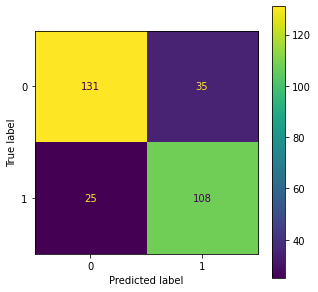

In [ ]:
cm = confusion_matrix(y_valid, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)


fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)

In [ ]:
%%capture
param_grid = {'clf__C': [0.001, 0.01, 0.1, 1], 
              'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'clf__kernel': ['rbf', 'sigmoid', 'linear']}

vect = TfidfVectorizer(analyzer='word')
preprocessor = make_column_transformer(
    (vect, 'text_lower_no_emoji'))

model = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', clf),
    ])  

skf = StratifiedKFold(n_splits=3)
grid = GridSearchCV(model, param_grid, scoring='f1_macro', refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

accuracy:   0.728
               precision    recall  f1-score   support

not offensive       0.57      0.62      0.60       323
    offensive       0.81      0.78      0.80       677

     accuracy                           0.73      1000
    macro avg       0.69      0.70      0.70      1000
 weighted avg       0.73      0.73      0.73      1000



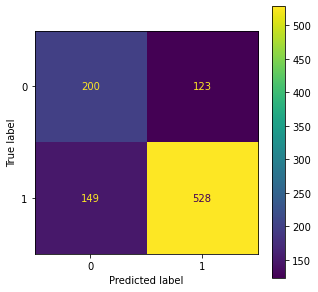

In [ ]:
y_pred = grid.predict(X_valid)

# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['not offensive', 'offensive']))
cm = confusion_matrix(y_valid, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)

accuracy:   0.728
              precision    recall  f1-score   support

           0       0.57      0.62      0.60       323
           1       0.81      0.78      0.80       677

    accuracy                           0.73      1000
   macro avg       0.69      0.70      0.70      1000
weighted avg       0.73      0.73      0.73      1000



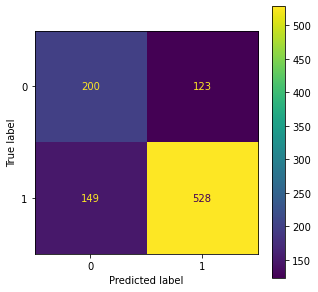

In [ ]:
#on unseen data

X_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
X_valid = X_valid.astype(str).dropna()
y_pred = grid.predict(X_valid)

y_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
y_valid = y_valid.rename(columns={0: 'ID', 1: 'text', 2: 'label'})
y_valid = y_valid['label']
# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['0', '1']))

cm = confusion_matrix(y_valid, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)

In [ ]:
y_pred_SVM = y_pred


# Pretrained models testing

Note: Fine tuning code was commented out to facilitate re-running the notebook.

## poliBERT

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("unideeplearning/polibert_sa")
model = AutoModelForSequenceClassification.from_pretrained("unideeplearning/polibert_sa")
            



text = "Giuseppe Rossi è un pessimo politico"
input_ids = tokenizer.encode(text, add_special_tokens=True, return_tensors= 'pt')


logs = model(input_ids)
logs = logs.logits.squeeze(0)

prob = nn.functional.softmax(logs, dim=0)

# 0 Negative, 1 Neutral, 2 Positive 
print(prob.argmax().tolist())

Downloading:   0%|          | 0.00/101 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/636 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

0


In [ ]:
df = ITA_FB_TRAIN
df = df.dropna()
df.text_lower_no_emoji = df.text_lower_no_emoji.astype(str)

df = df.dropna()
y = df.label.values
X = df[['text_lower_no_emoji']]

X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                    stratify=y, 
                                                    random_state=1,
                                                  test_size=.20, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem,
                                                    test_size=0.5, shuffle=True,
                                                   random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_valid.shape, y_valid.shape

((2389, 1), (299, 1), (2389,), (299,), (299, 1), (299,))

In [ ]:
def prediction(text):
  text = demoji.replace(string=text, repl='')
  input_ids = tokenizer.encode(text, add_special_tokens=True, return_tensors= 'pt')


  logs = model(input_ids)
  logs = logs.logits.squeeze(0)

  prob = nn.functional.softmax(logs, dim=0)

  if prob.argmax().tolist() == 1 or prob.argmax().tolist() == 2:
    return 0
  else:
    return 1

In [ ]:
y_pred = X_valid['text_lower_no_emoji'].apply(prediction)
y_pred = y_pred.values
# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['0', '1']))

accuracy:   0.819
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       166
           1       0.77      0.84      0.81       133

    accuracy                           0.82       299
   macro avg       0.82      0.82      0.82       299
weighted avg       0.82      0.82      0.82       299



In [ ]:
#on unseen data

X_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
X_valid = X_valid.astype(str).dropna()
y_pred = X_valid['text_lower_no_emoji'].apply(prediction)
y_pred = y_pred.values
y_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
y_valid = y_valid.rename(columns={0: 'ID', 1: 'text', 2: 'label'})
y_valid = y_valid['label']
# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['0', '1']))

accuracy:   0.802
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       323
           1       0.84      0.88      0.86       677

    accuracy                           0.80      1000
   macro avg       0.78      0.76      0.77      1000
weighted avg       0.80      0.80      0.80      1000



In [ ]:
#y_pred_PLB = y_pred


## Fine Tuning Polibert

In [ ]:
# dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_train.csv')
# train_model = dataset[['text_lower_no_emoji', 'label']].sample(frac=0.75)
# validation_model = dataset[['text_lower_no_emoji', 'label']].drop(train_model.index)
# train_model = train_model.dropna()
# validation_model = validation_model.dropna()
# train = Dataset.from_pandas(train_model, preserve_index=False)
# validation = Dataset.from_pandas(validation_model, preserve_index=False)

# tokenizer = AutoTokenizer.from_pretrained("unideeplearning/polibert_sa")

# def tokenize_function(example):
#     return tokenizer(example["text_lower_no_emoji"], padding="max_length", truncation=True)

# tokenized_train_dataset = train.map(tokenize_function, batched=True)
# tokenized_test_dataset = validation.map(tokenize_function, batched=True)
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
# import os
# os.environ["WANDB_DISABLED"] = "true"
# training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")   # default arguments for fine-tuning
# model = AutoModelForSequenceClassification.from_pretrained("unideeplearning/polibert_sa", num_labels=3)  # overwriting model for sequence binary classification

# def compute_metrics(eval_preds):   # compute accuracy and f1-score
#     metric = load_metric("glue", "mrpc")
#     logits, labels = eval_preds
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

# trainer = Trainer(   # specifying trainer class
#     model,
#     training_args,
#     train_dataset=tokenized_train_dataset,
#     eval_dataset=tokenized_test_dataset,
#     data_collator=data_collator,
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
# )

# trainer.train()  # starts fine-tuning

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.378506,0.846051,0.827586
2,0.375000,0.543622,0.863454,0.857542
3,0.375000,0.595880,0.867470,0.858773


TrainOutput(global_step=840, training_loss=0.2840309052240281, metrics={'train_runtime': 703.0844, 'train_samples_per_second': 9.558, 'train_steps_per_second': 1.195, 'total_flos': 1768122167132160.0, 'train_loss': 0.2840309052240281, 'epoch': 3.0})

In [ ]:
#trainer.save_model("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_POLIBERT")


## Testing Fined Tuned POLIBERT

In [ ]:


model = AutoModelForSequenceClassification.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_POLIBERT")
tokenizer = AutoTokenizer.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_POLIBERT")


def prediction(text):
  text = demoji.replace(string=text, repl='')
  input_ids = tokenizer.encode(text, add_special_tokens=True, return_tensors= 'pt')


  logs = model(input_ids)
  logs = logs.logits.squeeze(0)

  prob = nn.functional.softmax(logs, dim=0)

  return prob.argmax().tolist()

#on unseen data


X_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
X_valid = X_valid.text_lower_no_emoji.astype(str).dropna()
y_pred = X_valid.apply(prediction)
y_pred = y_pred.values

print(len(y_pred))
y_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
y_valid = y_valid.rename(columns={0: 'ID', 1: 'text', 2: 'label'})
y_valid = y_valid.dropna()
y_valid.text = y_valid.text
y_valid = y_valid['label']
# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['0', '1']))

1000
accuracy:   0.868
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       323
           1       0.87      0.94      0.91       677

    accuracy                           0.87      1000
   macro avg       0.86      0.83      0.84      1000
weighted avg       0.87      0.87      0.86      1000



In [ ]:
y_pred_PLB = y_pred

## umBERTo

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Musixmatch/umberto-wikipedia-uncased-v1")
umberto = AutoModel.from_pretrained("Musixmatch/umberto-wikipedia-uncased-v1")

encoded_input = tokenizer.encode("Umberto Eco è stato un grande scrittore")
input_ids = torch.tensor(encoded_input).unsqueeze(0)  # Batch size 1
outputs = umberto(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element 

Downloading:   0%|          | 0.00/309 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/801k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

In [ ]:
happy_tc = HappyTextClassification('camembert', "Musixmatch/umberto-wikipedia-uncased-v1")

In [ ]:
results = happy_tc.classify_text('Mi chiamo Leonardo')

In [ ]:
results

## Fine Tuning umBERTo

In [ ]:
# dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_train.csv')

In [ ]:
# train_model = dataset[['text_lower_no_emoji', 'label']].sample(frac=0.75)
# validation_model = dataset[['text_lower_no_emoji', 'label']].drop(train_model.index)
# train_model = train_model.dropna()
# validation_model = validation_model.dropna()

In [ ]:
# train_model['label'].value_counts()

In [ ]:
# print(f'model Train Size: {train_model.shape}')
# print(f'model Validation Size: {validation_model.shape}')

In [ ]:
# train = Dataset.from_pandas(train_model, preserve_index=False)
# validation = Dataset.from_pandas(validation_model, preserve_index=False)

# print(train)
# print(validation)


In [ ]:
# tokenizer = AutoTokenizer.from_pretrained('Musixmatch/umberto-wikipedia-uncased-v1')

# def tokenize_function(example):
#     return tokenizer(example["text_lower_no_emoji"], padding="max_length", truncation=True)

# tokenized_train_dataset = train.map(tokenize_function, batched=True)
# tokenized_test_dataset = validation.map(tokenize_function, batched=True)
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# import os
# os.environ["WANDB_DISABLED"] = "true"


In [ ]:
# training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")   # default arguments for fine-tuning
# model = AutoModelForSequenceClassification.from_pretrained('Musixmatch/umberto-wikipedia-uncased-v1', num_labels=2)  # overwriting model for sequence binary classification

# def compute_metrics(eval_preds):   # compute accuracy and f1-score
#     metric = load_metric("glue", "mrpc")
#     logits, labels = eval_preds
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

# trainer = Trainer(   # specifying trainer class
#     model,
#     training_args,
#     train_dataset=tokenized_train_dataset,
#     eval_dataset=tokenized_test_dataset,
#     data_collator=data_collator,
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
# )

# trainer.train()  # starts fine-tuning

## Testing fine-tuned umBERTo

In [ ]:
#trainer.save_model("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_UMBERTO")


In [ ]:
# y = df.label.values
# X = df[['text_lower_no_emoji']]

# X_train, X_rem, y_train, y_rem = train_test_split(X, y,
#                                                     stratify=y, 
#                                                     random_state=1,
#                                                   test_size=.20, shuffle=True)
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem,
#                                                     test_size=0.5, shuffle=True,
#                                                    random_state=1)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_valid.shape, y_valid.shape

((2389, 1), (299, 1), (2389,), (299,), (299, 1), (299,))

In [ ]:
# import tensorflow as tf
# model = AutoModelForSequenceClassification.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_UMBERTO")
# tokenizer = AutoTokenizer.from_pretrained('Musixmatch/umberto-wikipedia-uncased-v1')


# def prediction(text):
#   input_ids = tokenizer.encode(text, add_special_tokens=True, return_tensors= 'pt')

#   prediction = model(input_ids)
#   prediction_logits = prediction[0].detach()
#   prediction_probs = tf.nn.softmax(prediction_logits,axis=1).numpy()
#   return prediction_probs.argmax()

Downloading:   0%|          | 0.00/309 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/801k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210 [00:00<?, ?B/s]

In [ ]:
# from tensorflow.python.ops.numpy_ops import np_config
# np_config.enable_numpy_behavior()

# #on seen data

# y_pred = X_valid['text_lower_no_emoji'].apply(prediction)
# y_pred = y_pred.values
# # compute the performance measures
# score1 = metrics.accuracy_score(y_valid, y_pred)
# print("accuracy:   %0.3f" % score1)

# print(metrics.classification_report(y_valid, y_pred,
#                                             target_names=['0', '1']))

accuracy:   0.923
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       166
           1       0.93      0.89      0.91       133

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.92      0.92      0.92       299



In [ ]:
#on unseen data


X_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
X_valid = X_valid.text_lower_no_emoji.astype(str).dropna()
y_pred = X_valid.apply(prediction)
y_pred = y_pred.values

In [ ]:
#on unseen data

print(len(y_pred))
y_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
y_valid = y_valid.rename(columns={0: 'ID', 1: 'text', 2: 'label'})
y_valid = y_valid.dropna()
y_valid.text = y_valid.text
y_valid = y_valid['label']
# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['0', '1']))

1000
accuracy:   0.868
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       323
           1       0.87      0.94      0.91       677

    accuracy                           0.87      1000
   macro avg       0.86      0.83      0.84      1000
weighted avg       0.87      0.87      0.86      1000



In [ ]:
y_pred_UMB = y_pred

# Fine Tunig BERT ITALIAN

In [ ]:
# dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_train.csv')
# train_model = dataset[['text_lower_no_emoji', 'label']].sample(frac=0.75)
# validation_model = dataset[['text_lower_no_emoji', 'label']].drop(train_model.index)
# train_model = train_model.dropna()
# validation_model = validation_model.dropna()
# train = Dataset.from_pandas(train_model, preserve_index=False)
# validation = Dataset.from_pandas(validation_model, preserve_index=False)

# tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-xxl-uncased")

# def tokenize_function(example):
#     return tokenizer(example["text_lower_no_emoji"], padding="max_length", truncation=True)

# tokenized_train_dataset = train.map(tokenize_function, batched=True)
# tokenized_test_dataset = validation.map(tokenize_function, batched=True)
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
# import os
# os.environ["WANDB_DISABLED"] = "true"
# training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")   # default arguments for fine-tuning
# model = AutoModelForSequenceClassification.from_pretrained("dbmdz/bert-base-italian-xxl-uncased", num_labels=2)  # overwriting model for sequence binary classification

# def compute_metrics(eval_preds):   # compute accuracy and f1-score
#     metric = load_metric("glue", "mrpc")
#     logits, labels = eval_preds
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

# trainer = Trainer(   # specifying trainer class
#     model,
#     training_args,
#     train_dataset=tokenized_train_dataset,
#     eval_dataset=tokenized_test_dataset,
#     data_collator=data_collator,
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
# )

# trainer.train()  # starts fine-tuning

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.360124,0.854083,0.852503
2,0.360000,0.502930,0.868809,0.857971
3,0.360000,0.583117,0.868809,0.868633


TrainOutput(global_step=840, training_loss=0.2765449024382092, metrics={'train_runtime': 691.9868, 'train_samples_per_second': 9.711, 'train_steps_per_second': 1.214, 'total_flos': 1768106292019200.0, 'train_loss': 0.2765449024382092, 'epoch': 3.0})

In [ ]:
#trainer.save_model("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_ITABERT")


In [ ]:
import tensorflow as tf
model = AutoModelForSequenceClassification.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_ITABERT")
tokenizer = AutoTokenizer.from_pretrained('/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_ITABERT')


def prediction(text):
  input_ids = tokenizer.encode(text, add_special_tokens=True, return_tensors= 'pt')

  prediction = model(input_ids)
  prediction_logits = prediction[0].detach()
  prediction_probs = tf.nn.softmax(prediction_logits,axis=1).numpy()
  return prediction_probs.argmax()

In [ ]:
#on unseen data


X_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
X_valid = X_valid.text_lower_no_emoji.astype(str).dropna()
y_pred = X_valid.apply(prediction)
y_pred = y_pred.values

In [ ]:
#on unseen data

print(len(y_pred))
y_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
y_valid = y_valid.rename(columns={0: 'ID', 1: 'text', 2: 'label'})
y_valid = y_valid.dropna()
y_valid.text = y_valid.text
y_valid = y_valid['label']
# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['0', '1']))

1000
accuracy:   0.875
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       323
           1       0.87      0.95      0.91       677

    accuracy                           0.88      1000
   macro avg       0.88      0.83      0.85      1000
weighted avg       0.88      0.88      0.87      1000



In [ ]:
y_pred_BERT_ita = y_pred

# Ensemble

In [ ]:
print(len(y_pred_BERT_ita), len(y_pred_PLB), len(y_pred_UMB))

ensemble = pd.DataFrame(y_pred_BERT_ita, columns=['y_pred_BERT_ita'])
ensemble['y_pred_PLB'] = y_pred_PLB
#ensemble['y_pred_UMB'] = y_pred_UMB

result = pd.concat([ITA_FB_TRAIN, ensemble], axis=1)


1000 1000 1000


In [ ]:
def ensemble_output(row) -> int:
  if row['y_pred_BERT_ita'] + row['y_pred_PLB'] >= 2:
  
    return 1

  if row['y_pred_BERT_ita']  == 1:
  
    return 1
  
  if row['y_pred_BERT_ita'] + row['y_pred_PLB'] == 0:

    return 0
  
  else:

    return 0


  


ensemble_predict = ensemble.apply(lambda row: ensemble_output(row), axis=1)


accuracy:   0.875
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       323
           1       0.87      0.95      0.91       677

    accuracy                           0.88      1000
   macro avg       0.88      0.83      0.85      1000
weighted avg       0.88      0.88      0.87      1000



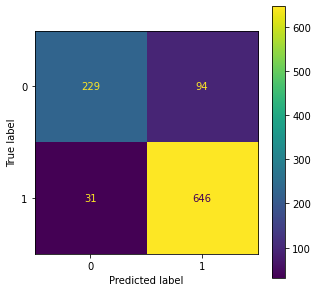

In [ ]:
#on unseen data


y_pred = ensemble_predict
y_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
y_valid = y_valid.rename(columns={0: 'ID', 1: 'text', 2: 'label'})
y_valid = y_valid['label']
# compute the performance measures
score1 = metrics.accuracy_score(y_valid, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_valid, y_pred,
                                            target_names=['0', '1']))
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)